# CCN 2023 Tutorial
## Cognitive models of Behavior: Classical and Deep Learning Approaches

By Maria Eckstein, Kevin Miller, Kim Stachenfeld

(https://colab.research.google.com/drive/1HMsETdAFzJ2yQou2m-qJZzDlpfxgcrO8?usp=sharing)

# Getting started
To execute a "cell", you'll press Shift-Enter.

### Hosted Colab
If you're working from a hosted colab (recommended):
1. File > Save a copy in Drive
2. Connect (top right) > Connect to a hosted runtime (GPU)

### Run locally as a Jupyter Notebook

You can also open the notebook in jupyter notebook or a locally hosted colab. To run locally, you can open a terminal window and download the code with:

```
git clone https://github.com/kstach01/CogModelingRNNsTutorial
```

### Jupyter notebook

To run as a jupyter notebook, you can in the terminal window run the following. Note that much of the formatting will be lost in Jupyter Notebook.

```
pip install notebook
git clone https://github.com/kstach01/CogModelingRNNsTutorial
cd CogModelingRNNsTutorial
jupyter notebook CCN2023_CogModelingRNNsTutorial2023.ipynb
```


### Local colab kernel

To run locally from colab, you can follow the steps above to install jupyter notebook, then run the following:

```
  jupyter notebook \
    --NotebookApp.allow_origin='https://colab.research.google.com' \
    --port=8888 \
    --NotebookApp.port_retries=0
```
This will generate text including a link which will be what you connect the colab to.

You can then go to [https://research.google.com/colaboratory/](https://research.google.com/colaboratory/) and open CCN2023_CogModelingRNNsTutorial2023.ipynb.

To connect to the kernel, go to the down arrow in the top right corner > "Connect to local runtime" and then copy in the link generated by the command.

# Hints

**Need help?** To view information about a function or class, type `?` before the name of the function or class (For example, `?print` or `?str` will cause information about the print function or the string datatype to pop up on the right.)

**Table of Contents:** To view the Table of contents for the tutorial, you can click the icon in the top left with three dots next to three lines.

# Resources

**Code:** Additional code used by the tutorial can be found at [github.com/kstach01/CogModelingRNNsTutorial](https://github.com/kstach01/CogModelingRNNsTutorial). You are welcome to peruse it; however, it is not required to understand the tutorial.

# Introduction & Overview

In this Colab, you will learn how to implement and work with some of today's models.

* **Part 1: We will fit a Reinforcement Learning (RL) model to rat dataset.** We will learn *how to fit a computational model* (e.g., what is a negative log likelihood?). And we will see *what we can learn from an RL model* (e.g., interpreting values and learning rates). We will also see what we *can't* learn from this model (think interpretability versus predictive power).

* **Part 2: We will fit a recurrent neural network (GRU) to the same dataset.** We will learn how to set up and train a neural network on a dataset (spoiler: not that hard). We will see how it solves some of the problems we encountered when working with the classic RL model (think predictive power). And we will also see that we now encounter new problems (think interpretability).

* **Part 3: We will talk about two methods that combine the strengths of the classical and the neural network approach.** There are *many* ways to solve this conundrum. We will talk about two specific ones:
  * *Disentangled RNNs*, which produce interpretable models of behavior by forcing a neural network to disentangle its representation.
  * *Hybrid RNNs*, which test specific asssumptions of RL in a fully data-driven way, using neural networks.

* **Part 4: We will repeat Parts 1-3 with a "Mystery Agent" and see if we can uncover its mechanisms.** In Part 1, we are using fitting a 2-parameter Q-agent model to behavior generated by a 2-parameter Q-agent -- no surprise if we can fit that! Now we will explore using a "mystery agent" whose mechanism is unknown and is not an exact match for the RL model.

* **Part 5 (stretch): We will repeat Parts 1-3 with a Real World Dataset consisting of rats performing a 2-armed bandit task (Miller et al 2018).** We will see how different model classes shed light on the learning behavior of real rats.

***Let's get started!***

# Imports

Go ahead and run the two cells below to install and load the required packages.

In [1]:
#@title Install required packages.
try:
    from google.colab import files
    _ON_COLAB = True
except:
    _ON_COLAB = False

if _ON_COLAB:
  !rm -rf CogModelingRNNsTutorial
  !git clone https://github.com/kstach01/CogModelingRNNsTutorial
  !pip install -e CogModelingRNNsTutorial/CogModelingRNNsTutorial
  !cp CogModelingRNNsTutorial/CogModelingRNNsTutorial/*py CogModelingRNNsTutorial
else:
  !pip install CogModelingRNNsTutorial/requirements.txt

ERROR: Invalid requirement: 'CogModelingRNNsTutorial/requirements.txt': Expected end or semicolon (after name and no valid version specifier)
    CogModelingRNNsTutorial/requirements.txt
                           ^


In [2]:
?print

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [1]:
# find python envs
import sys
print(sys.version)
print(sys.executable)

3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]
D:\Users\24546\anaconda3\envs\python39\python.exe


In [2]:
pip install -r D:\Code\PycharmProjects\CogModelingRNNsTutorial-main/requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.
  Using cached dm_haiku-0.0.12-py3-none-any.whl.metadata (19 kB)
  Using cached jmp-0.0.4-py3-none-any.whl.metadata (8.9 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached rich-13.8.1-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------------------------------ --- 7.1/7.8 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 30.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   ------- -------------------------------- 2.9/15.9 MB 15.2 MB/s eta 0:00:01
   ------------- -------------------------- 5.5/15.9 MB 13.4 MB/s eta 0:00:01
   ------------

In [26]:
#@title Imports + defaults settings.
%load_ext autoreload
%autoreload 2

import haiku as hk
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import optax
import os
import warnings

warnings.filterwarnings("ignore") 
#忽略所有的警告信息，不会在控制台输出任何警告内容,保持输出整洁

try:
    from google.colab import files
    _ON_COLAB = True
except:
    _ON_COLAB = False

from CogModelingRNNsTutorial import bandits
from CogModelingRNNsTutorial import disrnn
from CogModelingRNNsTutorial import hybrnn
from CogModelingRNNsTutorial import plotting
from CogModelingRNNsTutorial import rat_data
from CogModelingRNNsTutorial import rnn_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#@title Imports + defaults settings.
%load_ext autoreload
%autoreload 2

import haiku as hk
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import optax
import os
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from CogModelingRNNsTutorial import bandits
from CogModelingRNNsTutorial import disrnn
from CogModelingRNNsTutorial import hybrnn
from CogModelingRNNsTutorial import plotting
from CogModelingRNNsTutorial import rat_data
from CogModelingRNNsTutorial import rnn_utils

# Part 0: Reinforcement Learning (RL)

In this section, you will get experience defining an RL agent and a simple two-armed bandit environment. The exercises in this section are intended to provide an intuition for the structure of the environment and how the agent works.

First, we want to get an intuition for the types of agents and environments that we will be working with. This builds on code (in the `bandits.py` file on
[github](https://github.com/kstach01/CogModelingRNNsTutorial), in case you are curious -- you should not need to access the code directly to do these exercises). The code in `bandits.py` implements RL agents (called `AgentQ`) and 2-armed bandit task environment (called `EnvironmentBanditsDrift`).

Below we will define an instance of agent and environment, respectively.

Execute the cell below to do all of this.

<a name="rl-in-a-nutshell"></a>
## RL in a nutshell

The environment in this task is a 2-armed drifting bandit, meaning that there are two available actions that each elicit stochastic rewards, and the probability of the reward drifts gradually over time.

An RL agent learns "Q-values" for each action (aka the expected reward of each action) in order to decide what choices to make. When the agent receives a reward for an action it chose, it will increment the Q-value of this action; when it does not receive a reward for its action, it will decrease the corresponding action value.

Repeating this process over and over, the agent's Q-values will get closer and closer to the actual reward probabilities. This means that the agent will be able to choose actions well, and therefore maximize rewards.


We'll see what this looks like for a single trial. First, we'll define an agent in the cell below. Then, we'll see how Q-values are modified after a single trial containing one choice and one reward outcome.

**Deep Dive: Q-values**

Remember that in RL, we always calculate reward prediction errors $\delta$:

$$\delta_t = r_t - Q_t(a_t)$$

In other words, we see how much reward $r$ we obtained on trial $t$ to get $r_t$. Then we check what the value $Q$ is of the action $a$ we chose on trial $t$ to get $Q_t(a_t)$. This entity $Q_t(a_t)$ is our "reward prediction".

Now, all that's left is to look at the difference between $Q_t(a_t)$ (our reward prediction) and the actual reward $r_t$, to obtain our "reward prediction error" $\delta_t$.

With the reward prediction error $\delta$, we can update our value $Q_t(a_t)$ to obtain $Q_{t+1}(a_t)$:

$$Q_{t+1}(a_t) = Q_t(a_t) + \alpha * \delta_t$$

For the update, we *could* simply add the reward prediction error $\delta_t$ to our old value estimate $Q_t$, to immediately arrive at $r_t$, the true outcome. However, we don't really want to move *all the way* from the old value $V_t$ to the actual outcome $r_t$. We only want to move *a little bit*, in order to keep around some of the things we have already learned in the past.

This is the reason why we first multiply $\delta_t$ by $\alpha$, the *learning rate*, before we add it to $Q_t(a_t)$. (The learning rate $\alpha$ is a number between 0 and 1 that "scales" the reward prediction error. For example, if $\alpha=0.25$, we move a quarter of the way from $Q_t$ to $r_t$.)

In [4]:
#@title Define an agent and an environment
gen_alpha = 0.3  #@param 学习率 0.25
gen_beta = 3  #探索参数  5
n_actions = 2   #指定可用的动作数量（左和右）


environment = bandits.EnvironmentBanditsDrift(sigma=0.1, n_actions=n_actions)
#创建一个带有漂移特性的环境，参数 sigma 控制环境的不确定性
agent = bandits.AgentQ(alpha=gen_alpha, beta=gen_beta, n_actions=environment.n_actions)
#初始化一个 Q-learning 代理，使用之前定义的学习率和探索参数

# For later: if you would like to check out a different environment, uncomment the lines below.
# environment = bandits.EnvironmentBanditsFlips(
#     block_flip_prob=0.02, reward_prob_high=0.8, reward_prob_low=0.2)

# For later: if you would like to check out a different agent, uncomment the lines below.
# agent = bandits.MysteryAgentQ(alpha=gen_alpha, beta=gen_beta, n_actions=environment.n_actions)

In [5]:
#@title Agent behavior: **One trial.**
agent.new_sess() #初始化agent会话为学习过程重置状态
print("Agent's initial Q-values:", agent.q)
# print("Environment's Reward Probabilities:", environment.reward_probs)
choice = agent.get_choice()  #调用agent的方法来选择一个动作（左或右）
print("Agent's choice", choice)
reward = environment.step(choice)  #执行动作获取环境奖励
print("Reward provided by the environment: ", reward)
agent.update(choice=choice, reward=reward)  #基于choice和reward，更新agent的Q值
print("Agent's new Q-values:", agent.q)

Agent's initial Q-values: [0.5 0.5]
Agent's choice 0
Reward provided by the environment:  True
Agent's new Q-values: [0.65 0.5 ]


**Question:** How did the Q-values change as a result of this outcome? What happened to the chosen action? What happened to the unchosen action?

**Exercise:** Execute the cell a few times to see what happens when the agent makes different choices and when it observes different outcomes.


Now, let's see how the agent performs on the task, doing 200 trials in a row on the environment we specified. Execute the cells below to run the agent through the loop.

**Questions:**
* What do the orange and blue line represent?
* What do the vertical green and red ticks represent?
* What is the relationship between the orange/blue and red/green lines


In [6]:
#@title Agent behavior: **One session**

n_trials = 500  #@param 200
choices = np.zeros(n_trials)
rewards = np.zeros(n_trials)
qs = np.zeros((n_trials, n_actions))
reward_probs = np.zeros((n_trials, n_actions))  #初始化变量

# For each trial: Step the agent, step the environment, record everything
for trial_i in np.arange(n_trials):
  # Record environment reward probs and agent Qs
  reward_probs[trial_i, :] = environment.reward_probs
  qs[trial_i, :] = agent.q
  # First, agent makes a choice
  choice = agent.get_choice()
  # Then, environment computes a reward
  reward = environment.step(choice)
  # Finally, agent learns
  agent.update(choice, reward)
  # Log choice and reward
  choices[trial_i] = choice
  rewards[trial_i] = reward

In [7]:
# 构建保存路径
save_dir = r'D:\Code\PycharmProjects\CogModelingRNNsTutorial-main\figure'
sub = 'Q-agent'
# 确保路径存在
os.makedirs(os.path.join(save_dir, sub), exist_ok=True)

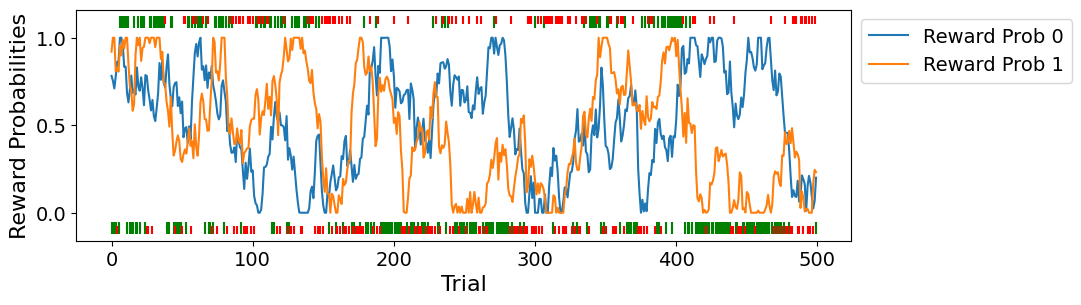

In [22]:
#@title Plot task structure and agent behavior.
bandits.plot_session(
    choices=choices, rewards=rewards, timeseries=reward_probs,
    timeseries_name='Reward Probabilities',
    labels=[f'Reward Prob {a}' for a in range(n_actions)])
# 调整布局
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p1_task_structure_agent_behaviour.png')
plt.savefig(save_path)
plt.show()

Let's understand how the agent made the choices it made - let's look under the hood. Execute the cell below and answer the following

**Questions:**
* What do the orange and blue line represent? (Spoiler: It's different from before)
* What happens to the orange line when there's a green tick on the top of the figure? What happens when there's a red tick on the top? What happens to the orange line when there are ticks on the bottom side?
* How do you explain the movements of the lines? (Hint: This is RL in action! Look back at [RL in a nutshell](#rl-in-a-nutshell))
* How are Q-values and actions related? In other words, how do the orange and blue lines in this figure compare to the orange and blue lines above?

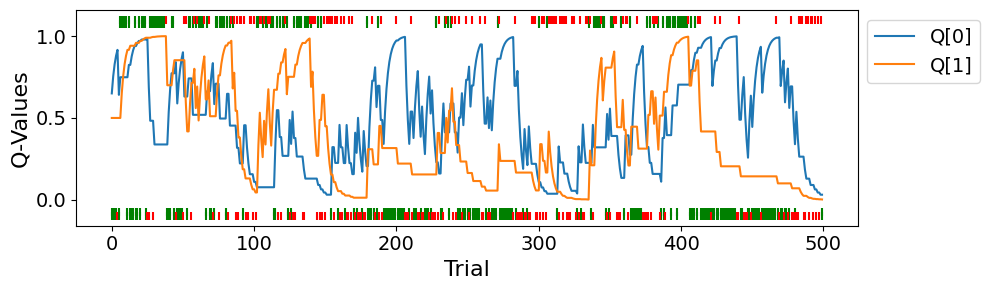

In [23]:
#@title Plot agent Q-values
bandits.plot_session(
    choices=choices,
    rewards=rewards,
    timeseries=qs,
    timeseries_name='Q-Values',
    labels=[f'Q[{a}]' for a in range(n_actions)])
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p2_agent_Q-values.png')
plt.savefig(save_path)
plt.show()

Now that we know what Q-values are, how a Q-learning agent works, and how it behaves, let's run a whole bunch of them. (This might take a few seconds.)

In [24]:
#@title Generate synthetic data: **Whole dataset**
n_trials_per_session = 1000 #200
n_sessions = 500  #100
dataset_train_to_view, experiment_list_to_view = bandits.create_dataset(
    agent=agent, environment=environment,
    n_trials_per_session=n_trials_per_session, n_sessions=n_sessions)
#生成数据集 调用create_dataset方法生成一个数据集传入agent和 env

# To sample the next element in a dataset. 从数据集中获取下一个样本
x, y = next(dataset_train_to_view)
print(f'x.shape = {x.shape} \ny.shape = {y.shape}')

x.shape = (1000, 500, 2) 
y.shape = (1000, 500, 1)


## Run diagnostics.
In order to understand the behavior of the agent in a richer way, we can generate some plots describing aspects of its behavior.

Run the cell below to see if the agent's actions are temporally autocorrelated; that is, what fraction of the time the agents choice now are the same as its choice n steps ago.

**Exercise:** what other diagnostics might you like to see? Feel free to make some of your own plots!

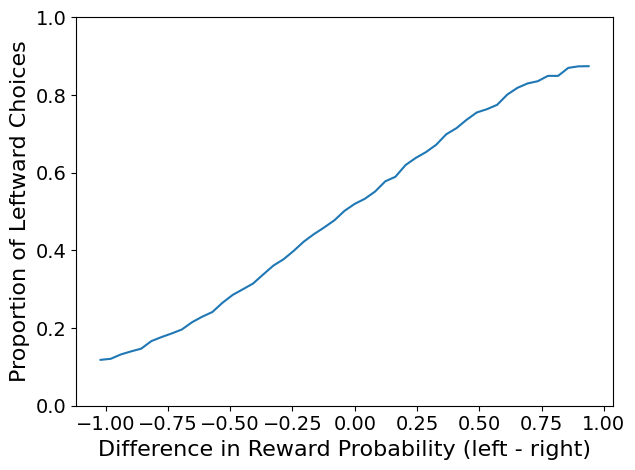

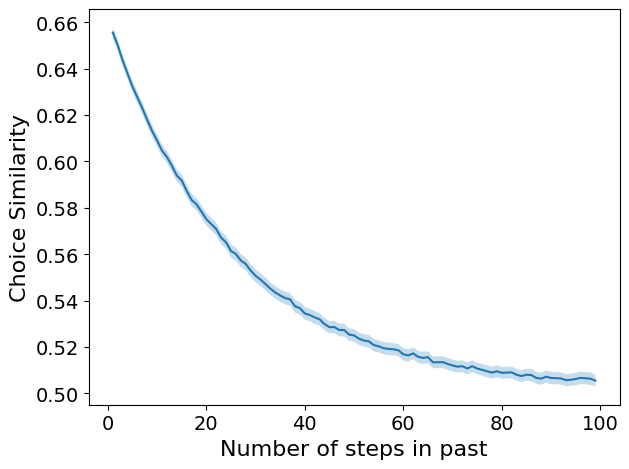

In [28]:
#@title Run some diagnostics to characterize the dataset
bandits.show_valuemetric(experiment_list_to_view)
#分析并可视化agent在不同实验中的价值度量评估表现
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p3_diagnostics.png')
plt.savefig(save_path)
plt.show()

plt.figure()
plotting.plot_action_similarity_to_history(experiment_list_to_view, n_steps_back=100)
#根据过去 100 步的历史数据，绘制代理所采取的动作与历史行为的相似性，以帮助理解其决策模式。

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p4_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()

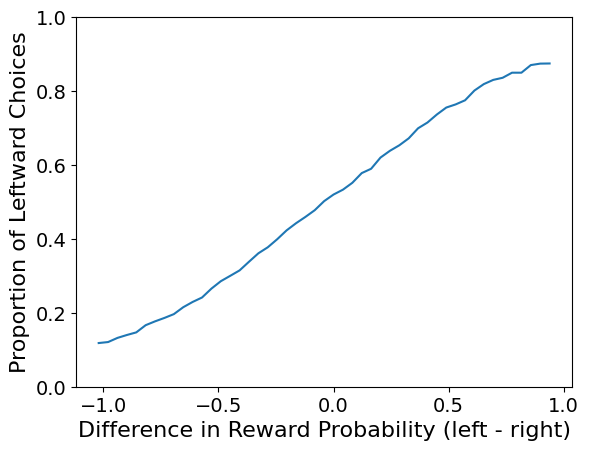

In [27]:
#@title Run some diagnostics to characterize the dataset
bandits.show_valuemetric(experiment_list_to_view)

**Exercise:** Experiment with different values of alpha and beta.

Go back to [the cell where we defined the agent](#define-agent-and-environment) and change the values of the `alpha` (note: `alpha` must be in the [0, 1] range) and `beta` parameter, then run all the cells until here. What changes in the behavior of the agent when you change `alpha`? What changes in the Q-values?

<a name="fit-classic-cognitive-model"></a>
# Part 1: Fit a Classic Cognitive Model

Now that we have an understanding of how our RL agent works, we will learn how to fit a cognitive model. In the following cell, select `dataset_type = SyntheticVanillaQ` from the dropdown menu on the right. (This will give us a dataset similar to the one above, where a Q-learning agent is performing a drifting 2-armed bandit task.) Select your preferred `alpha` (e.g., 0.25), `beta` (e.g., 5) parameters, and other parameters. Then run the cell.

In later exercises, we will substitute in different datasets by selecting different values for dataset_type from the dropdown menu below:
* `SyntheticMysteryQ` A more sophisticated "mystery agent", for which the cognitive model does not exactly match the agent
* `RealWorldRatDataset` real data from rats performing a bandit task with reversals. In order to access these, you'll first:
  1. Download any one data file from [https://drive.google.com/drive/folders/1UyV7Ne_-8cxSgIZA6ql_LulwJG5qMbvM?usp=sharing](https://drive.google.com/drive/folders/1UyV7Ne_-8cxSgIZA6ql_LulwJG5qMbvM?usp=sharing)
  2. When prompted to select a file to upload, select the file you've downloaded. The upload will take several seconds.

In [8]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

In [2]:
print("--------------------Part 1--------------------")

--------------------Part 1--------------------


In [4]:
#@title Select dataset type.
#@markdown ## Select dataset:

#dataset_type = 'SyntheticVanillaQ'  #@param ['SyntheticVanillaQ', 'SyntheticMysteryQ', 'RealWorldRatDataset']
#dataset_type = 'SyntheticMysteryQ'
dataset_type = 'RealWorldRatDataset'
is_synthetic = dataset_type.startswith('Synthetic')


#@markdown Set up parameters for synthetic data generation:  合成数据集的参数设置
if is_synthetic:
  gen_alpha = .3 #@param .25
  gen_beta = 3 #@param 5
  mystery_param = -2  #@param
  n_trials_per_session = 500  #@param 200
  n_sessions = 1000  #@param 220
  sigma = .1  #@param
  environment = bandits.EnvironmentBanditsDrift(sigma=sigma)

  # Set up agent.
  agent = {
      'SyntheticVanillaQ': bandits.VanillaAgentQ(gen_alpha, gen_beta),
      'SyntheticMysteryQ': bandits.MysteryAgentQ(gen_alpha, gen_beta, mystery_param=mystery_param),
      }[dataset_type]

  dataset_train, experiment_list_train = bandits.create_dataset(
      agent=agent,
      environment=environment,
      n_trials_per_session=n_trials_per_session,
      n_sessions=n_sessions)

  dataset_test, experiment_list_test = bandits.create_dataset(
      agent=agent,
      environment=environment,
      n_trials_per_session=n_trials_per_session,
      n_sessions=n_sessions)

#@markdown Set up parameters for loading rat data from Miller et al 2019.
#加载真实世界的实验数据 检查是否上传新数据文件 允许用户选择是否上传新数据文件
elif dataset_type == 'RealWorldRatDataset':
  upload_new_data_file = "True" #@param ["True", "False"]
  upload_new_data_file = upload_new_data_file == "True"

  if not _ON_COLAB:
    #LOCAL_PATH_TO_FILE = "<provide-filename-where-data-has-been downloaded>"  #@param
    LOCAL_PATH_TO_FILE = "E:/Data/rotation1_miller2018_rat/miller2018_rat01.npy"  #@param 不要用反斜杠
    if not os.path.exists(LOCAL_PATH_TO_FILE):
      raise ValueError('File not found.')
    FNAME_ = LOCAL_PATH_TO_FILE  #上传文件的文件名

  gen_alpha = "unknown"
  gen_beta = "unknown"
  sigma = 0.1  #@param
  environment = bandits.EnvironmentBanditsDrift(sigma=sigma)


#colab 处理上传文件的逻辑 提供下载链接 提示下载并上传 若上传多个只使用第一个

  if upload_new_data_file:
    url = "https://drive.google.com/drive/folders/1UyV7Ne_-8cxSgIZA6ql_LulwJG5qMbvM?usp=sharing"
    print(f'NOTE: Before you can upload a data file, you will need to download from from\n{url}\n\n Then you will select the file from the location where it has been downloaded and upload it to the colab.')
    uploaded = files.upload()
    FNAMES_ = list(uploaded.keys())
    FNAME_ = FNAMES_[0]
    if len(FNAMES_) > 1:
      print(f'\nWARNING: More than one file uploaded -- using only {FNAME_}.')

  else:
    if "FNAME_" not in list(locals().keys()):
      raise ValueError('No files found. Please change upload_new_data_file to True and upload a file.\nSee instructions above for more information.')

  dataset_train, dataset_test = rat_data.format_into_datasets(
      *rat_data.load_data_for_one_rat(FNAME_, '.')[:2], rnn_utils.DatasetRNN)
  n_trials_per_session, n_sessions, _ = dataset_train._xs.shape
  experiment_list_train = None
  experiment_list_test = None

else:
  raise NotImplementedError(
      (f'dataset_type {dataset_type} not implemented. '
       'Please select from drop-down list.'))



NOTE: Before you can upload a data file, you will need to download from from
https://drive.google.com/drive/folders/1UyV7Ne_-8cxSgIZA6ql_LulwJG5qMbvM?usp=sharing

 Then you will select the file from the location where it has been downloaded and upload it to the colab.


NameError: name 'files' is not defined

In [5]:
#@title Select dataset type.
#@markdown ## Select dataset:

#dataset_type = 'SyntheticVanillaQ'  #@param ['SyntheticVanillaQ', 'SyntheticMysteryQ', 'RealWorldRatDataset']
#dataset_type = 'SyntheticMysteryQ'
dataset_type = 'RealWorldRatDataset'
is_synthetic = dataset_type.startswith('Synthetic')


#@markdown Set up parameters for synthetic data generation:  合成数据集的参数设置
if is_synthetic:
  gen_alpha = .25 #@param
  gen_beta = 5 #@param
  mystery_param = -2  #@param
  n_trials_per_session = 200  #@param
  n_sessions = 220  #@param
  sigma = .1  #@param
  environment = bandits.EnvironmentBanditsDrift(sigma=sigma)

  # Set up agent.
  agent = {
      'SyntheticVanillaQ': bandits.VanillaAgentQ(gen_alpha, gen_beta),
      'SyntheticMysteryQ': bandits.MysteryAgentQ(gen_alpha, gen_beta, mystery_param=mystery_param),
      }[dataset_type]

  dataset_train, experiment_list_train = bandits.create_dataset(
      agent=agent,
      environment=environment,
      n_trials_per_session=n_trials_per_session,
      n_sessions=n_sessions)

  dataset_test, experiment_list_test = bandits.create_dataset(
      agent=agent,
      environment=environment,
      n_trials_per_session=n_trials_per_session,
      n_sessions=n_sessions)

#@markdown Set up parameters for loading rat data from Miller et al 2019.
#加载真实世界的实验数据 检查是否上传新数据文件 允许用户选择是否上传新数据文件
elif dataset_type == 'RealWorldRatDataset':
  upload_new_data_file = "True" #@param ["True", "False"]
  upload_new_data_file = upload_new_data_file == "True"

  if not _ON_COLAB:
    #LOCAL_PATH_TO_FILE = "<provide-filename-where-data-has-been downloaded>"  #@param
    LOCAL_PATH_TO_FILE = "E:/Data/rotation1_miller2018_rat/miller2018_rat01.npy"  #@param 不要用反斜杠,应指向具体的文件名
    if not os.path.exists(LOCAL_PATH_TO_FILE):
      raise ValueError('File not found.')
    FNAME_ = LOCAL_PATH_TO_FILE  #上传文件的文件名

  gen_alpha = "unknown"
  gen_beta = "unknown"
  sigma = 0.1  #@param
  environment = bandits.EnvironmentBanditsDrift(sigma=sigma)

  dataset_train, dataset_test = rat_data.format_into_datasets(
      *rat_data.load_data_for_one_rat(FNAME_, '.')[:2], rnn_utils.DatasetRNN)  #加载数据 将加载的数据格式化为训练和测试数据集
  n_trials_per_session, n_sessions, _ = dataset_train._xs.shape  #提取试验次数和会话数量
  experiment_list_train = None
  experiment_list_test = None


In [6]:
print(FNAME_)
print(n_trials_per_session)
print(n_sessions)

E:/Data/rotation1_miller2018_rat/miller2018_rat01.npy
880
65


In [7]:
print("FNAME_ = ", FNAME_)
print("n_trials_per_session = ", n_trials_per_session)
print("n_sessions = ", n_sessions)

FNAME_ =  E:/Data/rotation1_miller2018_rat/miller2018_rat01.npy
n_trials_per_session =  880
n_sessions =  65


---Run some diagnostics to characterize the dataset---


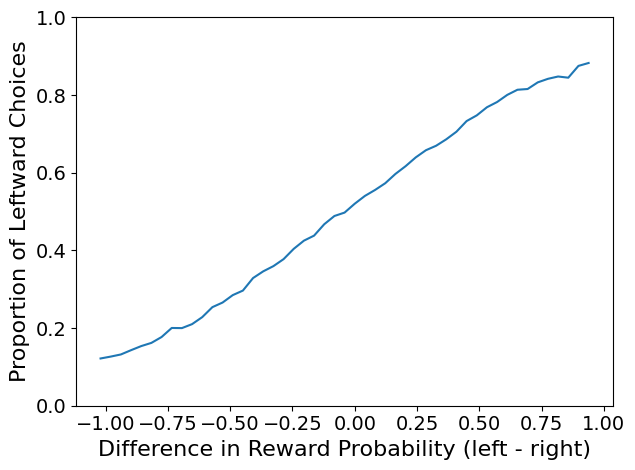

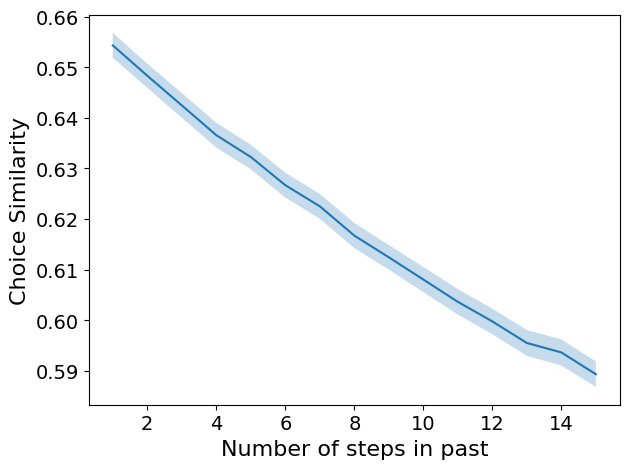

In [34]:
#@title Run some diagnostics to characterize the dataset
print("---Run some diagnostics to characterize the dataset---")

bandits.show_valuemetric(experiment_list_train)
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p4_diagnostics.png')
plt.savefig(save_path)
plt.show()

plt.figure()
plotting.plot_action_similarity_to_history(experiment_list_train, n_steps_back=16)
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p5_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()

Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.


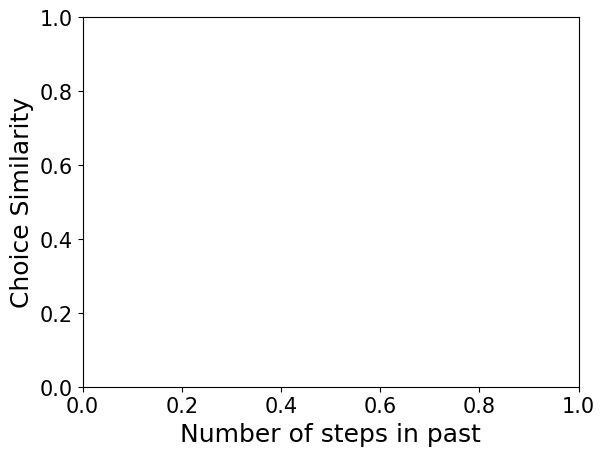

In [23]:
#@title Run some diagnostics to characterize the dataset
bandits.show_valuemetric(experiment_list_train)
plt.figure()
plotting.plot_action_similarity_to_history(experiment_list_train, n_steps_back=16)

#此处用rat数据集画不出来是正常的 因为experiment_list_train = None

# 构建保存路径
save_dir = r'D:\Code\PycharmProjects\CogModelingRNNsTutorial-main\figure'
sub_rat = 'rat00'
# 确保路径存在
os.makedirs(os.path.join(save_dir, sub_rat), exist_ok=True)
# 构建文件名并保存路径
save_path = os.path.join(save_dir, sub, f'{sub_rat}_p1_action_similarity_to_history.png')
# 保存图片
plt.savefig(save_path)
# 显示绘图（可选）
plt.show()

## RL as a Model of Behavior

To see if subjects use RL, we "fit" the RL model to human behavior. This means that we "squeeze" and "stretch" the RL agent until it produces behavior that corresponds to the human behavior. In this case, the "squeezing" and "stretching" consists of increasing or decreasing the values of the *free parameters* of the model, learning rate $\alpha$ and inverse decision temperature $\beta$.

How do we know if we need to change the values of $\alpha$ and $\beta$? By checking how close the behavior of the model is to human behavior (i.e., how similar the model pancake is to the human pancake). The closer the model behavior matches human behavior, the better the model "fits" the human dataset, and the less we have to change the parameters.

On the other hand, the more different the model behavior is from human behavior, the more we have to still wiggle on $\alpha$ and $\beta$ to get it to match more closely. We want the best possible fit, so we are looking for the values of $\alpha$ and $\beta$ that maximize the similarity between human and model behavior. To do this, we will *maximizes the probability* that the RL agent chooses the same actions that humans have chosen.

**Saying the same thing but more "mathy", our goal is to find the values of our model parameters ($\alpha$ and $\beta$) that maximize the likelihood of the observed (human) behavior under the model.**

To do this, we will:
* Write a function that calculates the negative log likelihood (NLL)
* Set up an optimizer that will minimize the NLL
* The smallest NLL corresponds to the best parameters! The model is fitted.

The cell below provides a function that calculates the log likelihood for us. It takes a dataset (`dataset`, e.g., our syntheticly created behavior), a model (`model_fun`, e.g., our Q-learning agent), and model parameters (`params`, e.g., a learning rate `alpha` and an inverse decision temperature `beta`) as inputs.
It returns the normalized likelihood of the dataset under the model and the parameters as an output.

The likelihood of our dataset under the model is simply the probability each choice we see in the dataset would have occurred in the model:
$$p(dataset) = \prod_{s=0}^{100} \prod_{t=0}^{150} p(a_{st})$$
This is the probability of each action at each trial $t$, for each subject $s$, which our model (aka RL agent) produces.

Because this is hard to calculate (numbers will get very small with so many multiplications), we take a trick: We take the log and add instead:
$$p(dataset) = \prod_{s=0}^{100} \prod_{t=0}^{150}p(a_{st}) = \sum_{s=0}^{100} \sum_{t=0}^{150} log(p(a_{st}))$$

And because we don't want the number of trials (150) and subjects (100) to influence our results, we often normalize the log-likelihood:
$$p(dataset) \propto \sum_{s=0}^{n_s} \sum_{t=0}^{n_t} log(p(a_{st})) \ / \ n_s \ / \ n_t$$

In [8]:
#@title Compute log-likelihood
#计算给定模型在一组数据上的对数似然 使用预测的选择概率来评估模型的表现 最终返回一个标准化的似然值 以百分比形式打印
def compute_log_likelihood(dataset, model_fun, params):

  xs, actual_choices = next(dataset)  #输入数据 实际选择
  n_trials_per_session, n_sessions = actual_choices.shape[:2] 
  model_outputs, model_states = rnn_utils.eval_model(model_fun, params, xs) #使用提供的模型函数和参数对输入数据进行评估，得到模型的输出和状态

  predicted_log_choice_probabilities = np.array(jax.nn.log_softmax(model_outputs[:, :, :2])) #计算模型输出的对数选择概率 假设模型输出的前两个元素对应于选择的两个类别

  log_likelihood = 0
  n = 0  # Total number of trials across sessions.
  for sess_i in range(n_sessions):
    for trial_i in range(n_trials_per_session):
      actual_choice = int(actual_choices[trial_i, sess_i])
      if actual_choice >= 0:  # values < 0 are invalid trials which we ignore.
        log_likelihood += predicted_log_choice_probabilities[trial_i, sess_i, actual_choice]
        n += 1

  normalized_likelihood = np.exp(log_likelihood / n) #标准化对数似然

  print(f'Normalized Likelihood: {100 * normalized_likelihood:.1f}%')

  return normalized_likelihood

Let's see if this all makes sense. Answer the following questions:

* Which values of `alpha` and `beta` should give us the **highest** likelihood for the current dataset? Why is that?  
* Which values should give us very **low** likelihoods?

Now let's see if we were right. Use the cell below to calculate the likelihoods for some different values of `alpha` and `beta`. Type the values into the interface on the right, and execute the cell to calculate the likelihood. Try a few different combinations to see if your intuition was right!

In [9]:
#@title Calculate the log likelihoods for example parameters
#设置参数并计算模型的对数似然，适用于调试和验证模型在不同参数下的表现。
#通过反sigmoid转换，确保alpha在模型中以合适的方式使用
test_alpha = 0.3 #@param
test_beta = 2 #@param

def inverse_sigmoid(x):
  return np.log(x/(1-x))

print('Calculating the log likelihood for alpha = {} and beta = {}.'.format(test_alpha, test_beta))
params = {'hk_agent_q': {'alpha_unsigmoid': inverse_sigmoid(jnp.array([test_alpha])), 'beta': jnp.array([test_beta])}}
_ = compute_log_likelihood(dataset_train, bandits.HkAgentQ, params)

Calculating the log likelihood for alpha = 0.3 and beta = 2.
Normalized Likelihood: 57.3%



If we were to calculate the LL for each combination of $\alpha \in [0, 1]$ and $\beta \in [0, 30]$, this is what we would get for data generated with `gen_alpha=0.75` and `gen_beta=5`. (The red cross marks the smallest NLL, aka best parameter combination):

<center><img src="https://github.com/trendinafrica/Comp_Neuro-ML_course/blob/main/notebooks/23-Friday/NllGrid.png?raw=1" width=700></center>

We now have everything in place to fit our model! We have a function that calculates the LL for a model (e.g., Q-learning) and some parameters (e.g., `alpha` and `beta`), on any dataset. All that's left is find the largest possible LL, and we'll have the optimal parameters! (To do this, we usually find the *smallest* possible *negative* LL or NLL. But the logic is the same.)

Congrats on making it until here---this is model fitting in a nutshell!

The next cell does just that: It takes an agent (our Q-learnner) and a dataset (the synthetic one we made above), and finds the parameters with the best LL.

In [10]:
#@title Fit parameters
#设置并执行模型拟合过程不断调整模型来最小化损失函数
rl_params, _ = rnn_utils.fit_model(
    model_fun=bandits.HkAgentQ,
    dataset=dataset_train,  
    loss_fun='categorical', #分类损失适用于多分类问题
    optimizer=optax.adam(1e-1),  #Adam优化器
    convergence_thresh=1e-5,  #收敛阈值
    n_steps_per_call=100,
    n_steps_max=1000)

Step 100 of 100; Loss: 1.5157e+04. (Time: 0.7s)
Model not yet converged - Running more steps of gradient descent. Time elapsed = 0e+00s.
Step 100 of 100; Loss: 1.5157e+04. (Time: 0.5s)
Model Converged! Time elapsed = 0e+00s.


While the cell is running, answer the following questions:

* Which parameters do you expect the function to return? I.e., what will the value be of `alpha`? And will the value be of `beta`? Why?
* Would the result be different for a different dataset? Why?

Now let's see! Execute the cell below to see what parameters we have fitted.

In [11]:
#提取并打印通过模型训练得到的参数 并与生成的参数比较
fit_alpha = jax.nn.sigmoid(rl_params['hk_agent_q']['alpha_unsigmoid'][0])
fit_beta = rl_params['hk_agent_q']['beta'][0]

print('Generative beta was: ', gen_beta)
print('Recovered beta was: ', fit_beta)
print('Generative alpha was: ', gen_alpha)
print('Recovered alpha was: ', fit_alpha)

Generative beta was:  unknown
Recovered beta was:  2.5359535
Generative alpha was:  unknown
Recovered alpha was:  0.602843


**Questions:**
* How does this model do in terms of interpretability? (A good way to think about his might be to think about the variables in the model: `alpha`, `beta`, Q-values. What does it mean that the model is build on these variables? How could we use them in a cognitive neurscience study?)
* How does this model do in terms of predictive power? (You can make a guess here - keep the question in mind until we have also fitted the neural network model in the next section.)

## Qualitative Model Fit

Now we will visually compare the performance of the RL agent that generated the dataset with the RL agent fit to that data, and see if they appear qualitatively similar. First, we will generate synthetic data from the agent with the fit model parameters. Then we can compare both side-by-side. If you coded up any of your own visualizations in Part 0, feel free to try them here!



In [12]:
#@title Synthesize a dataset using the fitted agent
#利用训练好的强化学习代理在指定环境中合成新的数据集 用于进一步分析模型表现或进行新的实验
#使用之前定义的模型函数 HkAgentQ 和拟合后的参数 rl_params 创建一个新的代理网络（AgentNetwork）
rl_agent = bandits.AgentNetwork(bandits.HkAgentQ, rl_params)  #执行决策的代理

#生成一个新的数据集
_, experiment_list_rl = bandits.create_dataset(rl_agent, environment, n_trials_per_session, n_sessions)

NameError: name 'save_dir' is not defined

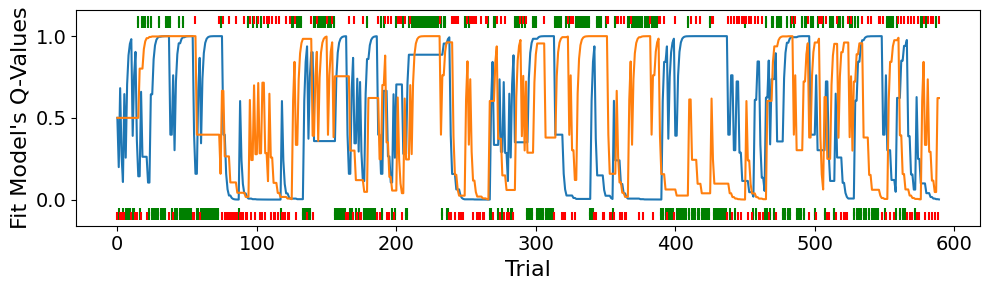

In [13]:
#@title Plot internal workings (latents) of the generating fitted model (aka the Q-values).
#运行已拟合的强化学习代理在一个会话中的表现，并绘制出该会话的选择、奖励和模型的Q值（即内部激活状态）
# Run the agent on a session
xs, ys = next(dataset_train) #输入特征 对应标签（实际选择）
network_outputs, network_states = rnn_utils.eval_model(bandits.HkAgentQ, rl_params, xs)

# Plot session
network_states = np.array(network_states)
sess_i = 0  #选择第一个session进行分析
trial_end = rnn_utils.find_session_end(xs[:, sess_i, 0])
choices = xs[:trial_end, sess_i, 0]
rewards = xs[:trial_end, sess_i, 1]
rl_activations = network_states[:trial_end, sess_i, :]  #Q值激活
bandits.plot_session(
    choices=choices, rewards=rewards, timeseries=rl_activations,
    timeseries_name="Fit Model's Q-Values")

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p6_session_0.png')
plt.savefig(save_path)
plt.show()

Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Total Reward Rate is: 58.858%


NameError: name 'save_dir' is not defined

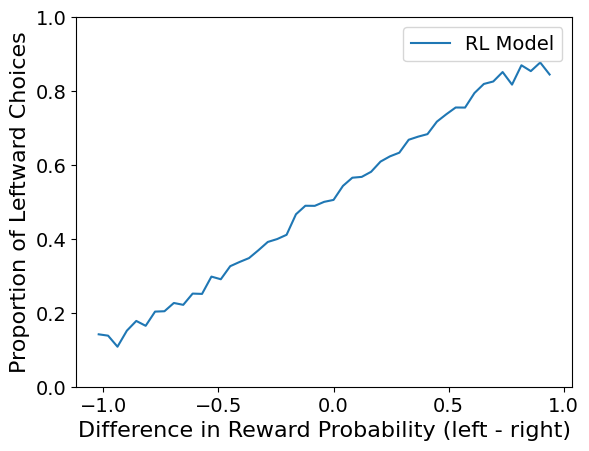

In [14]:
#@title Plot behavior diagnostics for each model.
#训练集、测试集强化学习模型的表现
#show_valuemetric 函数，用于绘制与价值相关的指标，比如模型的Q值、预测概率等，帮助评估模型在...上的表现。
#show_total_reward_rate 函数绘制训练集的总奖励率图 帮助理解模型在训练期间的整体表现，显示其在不同时间点获得的平均奖励
bandits.show_valuemetric(experiment_list_train, label='Train')
bandits.show_total_reward_rate(experiment_list_train)

bandits.show_valuemetric(experiment_list_test, label='Test')
bandits.show_total_reward_rate(experiment_list_test)

bandits.show_valuemetric(experiment_list_rl, label='RL Model')
bandits.show_total_reward_rate(experiment_list_rl)
plt.legend()

# 构建文件名并保存路径
save_path = os.path.join(save_dir, sub, f'{sub}_p3_behavior_diagnostics.png')
# 保存图片
plt.savefig(save_path)
# 显示绘图（可选）
plt.show()

---Plot behavior diagnostics for each model---
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Total Reward Rate is: 58.858%


NameError: name 'save_dir' is not defined

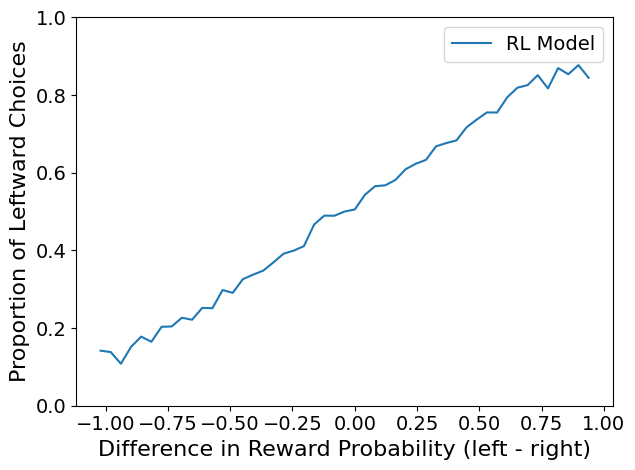

In [15]:
#@title Plot behavior diagnostics for each model.
#训练集、测试集强化学习模型的表现
print("---Plot behavior diagnostics for each model---")
#show_valuemetric 函数，用于绘制与价值相关的指标，比如模型的Q值、预测概率等，帮助评估模型在...上的表现。
#show_total_reward_rate 函数绘制训练集的总奖励率图 帮助理解模型在训练期间的整体表现，显示其在不同时间点获得的平均奖励
bandits.show_valuemetric(experiment_list_train, label='Train')
bandits.show_total_reward_rate(experiment_list_train)

bandits.show_valuemetric(experiment_list_test, label='Test')
bandits.show_total_reward_rate(experiment_list_test)

bandits.show_valuemetric(experiment_list_rl, label='RL Model')
bandits.show_total_reward_rate(experiment_list_rl)
plt.legend()

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p7_RL_behavior_diagnostics.png')
plt.savefig(save_path)
plt.show()

**Questions:**
* How do the models compare visually?
* Do the different diagnostics tell us different things?

NameError: name 'save_dir' is not defined

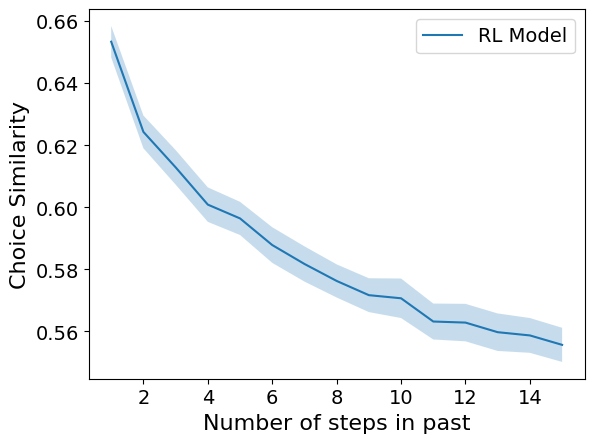

In [16]:
#绘制不同模型在选择行动时与其历史选择的相似性，帮助用户理解各个模型的决策过程和行为模式。
#这种可视化可以揭示模型是否能够有效地利用历史信息进行决策，以及强化学习模型在适应环境时的行为是否与训练阶段的一致。
#这是评估模型性能的重要工具，特别是在强化学习和行为建模中。
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    n_steps_back=16, #回溯步数 16
    labels=['Train', 'Test', 'RL Model'])
# 构建文件名并保存路径
save_path = os.path.join(save_dir, sub, f'{sub}_p4_action_similarity_to_history.png')
# 保存图片
plt.savefig(save_path)
# 显示绘图（可选）
plt.show()

NameError: name 'save_dir' is not defined

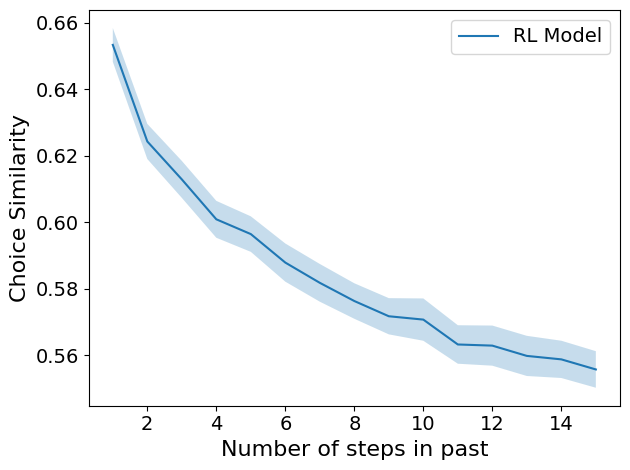

In [17]:
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    n_steps_back=16, #回溯步数 16
    labels=['Train', 'Test', 'RL Model'])

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p8_RL_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()

## Quantitative Model Fit

Oftentimes, we want to know the "quality of fit" of a model. This is the case when we fit several models (as we will do shortly), and want to know which one captures the dataset best.

A common choice to calculate model fit are measures such as AIC and BIC. However, these don't work well once we switch to neural networks. (The reason is that the AIC and BIC penalize models for their complexity, usually by counting "free parameters". But it is very hard to determine the model complexity of a neural network, or break it down to the number of free parameters.)

Another choice, which is more common in machine learning, is to calculate the fit on a "held-out" dataset - a dataset that the model has not seen during training, and hence does not know. The idea is that if the model is still able to predict the behavior in this new dataset, it captures the underlying patterns well. (This also solves a big problem when working with neural networks, called "overfitting": Because neural networks have so many free parameters and are so flexible, they can "overfit" to their training data - basically just memorizing it - without learning anything deeper about it. If that's the case, the model will fit very poorly to a held-out dataset.)

The good thing about calculating a model's quality of fit in terms of the held-out prediction is that it works for both classical models (like the Q-learning model we've used here), and for neural network models.

In [18]:
# Report quality of fit to held-out dataset
#打印训练集和测试集的标准化对数似然值 评估Q学习模型在训练集和测试集（未见过）上的表现，使用标准化对数似然作为度量指标。
print('Normalized Likelihoods for Q-Learning Model')
print('Training Dataset')
training_likelihood = compute_log_likelihood(dataset_train, bandits.HkAgentQ, params)
print('Held-Out Dataset')
testing_likelihood = compute_log_likelihood(dataset_test, bandits.HkAgentQ, params)

Normalized Likelihoods for Q-Learning Model
Training Dataset
Normalized Likelihood: 57.3%
Held-Out Dataset
Normalized Likelihood: 57.0%


**Questions:**
* What do you observe? Are the likelihoods the same or different? What does that indicate?

# Part 2: Fitting with RNNs

Now that we have seen what it is like to fit a classic cognitive model, let us see how we can fit a neural network to the data!

The logic will be very similar:
* We will set up the RNN model (in this case, we are using a model called Gated Recurent Units, or [GRUs](https://arxiv.org/abs/1406.1078). Just like the classic model, the RNN will choose actions in the 2-armed bandit task. It will make a choice, observe a reward, and then predict the probability of the subsequent choice. We will use this probability prediction to calculate our likelihood, just like we did above. Y
* Once we have the likelihood, we do the same we did above: We find the model parameters that maximize the likelihood, because these provide the best fit for the dataset. What is different here is the nature of the free parameters: Where we had `alpha` and `beta` above, here we have biases `b` and weights `W`.
* After fitting the model, we can again calculate the model fit, aka held-out likelihood. We will use the same training and testing dataset as we did before, so we will be able to directly compare how the predictions of this model compare to the predictions of the Q-learning model.

In [36]:
print("--------------------Part 2--------------------")

--------------------Part 2--------------------


In [19]:
#@title Set up the RNN (GRU) Model
n_hidden = 16  #@param
def make_gru():
  model = hk.DeepRNN(
      [hk.GRU(n_hidden), hk.Linear(output_size=2)]
  )
  return model

In [20]:
#@title Fit the RNN (GRU) model  训练基于GRU的RNN模型
#@markdown You can experiment with values, but n_steps_max = 5000 was used for testing.
print("Fit the RNN (GRU) model:")
n_steps_max = 5000 #@param
optimizer = optax.adam(learning_rate=1e-2)
gru_params, _ = rnn_utils.fit_model(
    model_fun=make_gru,
    dataset=dataset_train,
    optimizer=optimizer,
    convergence_thresh=1e-3,
    n_steps_max=n_steps_max)

Fit the RNN (GRU) model:
Step 500 of 500; Loss: 1.3061e+04. (Time: 14.7s)
Model not yet converged - Running more steps of gradient descent. Time elapsed = 0e+00s.
Step 500 of 500; Loss: 1.2649e+04. (Time: 14.3s)
Model not yet converged (convergence_value = 0.03156604) - Running more steps of gradient descent. Time elapsed = 0e+00s.
Step 500 of 500; Loss: 1.2527e+04. (Time: 14.8s)
Model not yet converged (convergence_value = 0.009641502) - Running more steps of gradient descent. Time elapsed = 0e+00s.
Step 500 of 500; Loss: 1.2446e+04. (Time: 14.9s)
Model not yet converged (convergence_value = 0.006421486) - Running more steps of gradient descent. Time elapsed = 0e+00s.
Step 500 of 500; Loss: 1.3139e+04. (Time: 14.4s)
Model not yet converged (convergence_value = 0.0556071) - Running more steps of gradient descent. Time elapsed = 0e+00s.
Step 500 of 500; Loss: 1.2378e+04. (Time: 14.6s)
Model not yet converged (convergence_value = 0.0578764) - Running more steps of gradient descent. Time 

In [21]:
#@title Compute quality-of-fit: Held-out Normalized Likelihood  评估模型表现
# Compute log-likelihood
print('Normalized Likelihoods for GRU')
print('Training Dataset')
training_likelihood = compute_log_likelihood(dataset_train, make_gru, gru_params)
print('Held-Out Dataset')
testing_likelihood = compute_log_likelihood(dataset_test, make_gru, gru_params)

Normalized Likelihoods for GRU
Training Dataset
Normalized Likelihood: 63.9%
Held-Out Dataset
Normalized Likelihood: 62.3%


**Questions**
* How does the log likelihood compare for the RNN compare to the RL model we fit?

Now that we have thought about model fit (predictive power), let's think about interpretability.
* Before you run the next cell, think about what it would mean for the model to be interpretable. In other words, how could we use the model to understand the cognitive better than agents were using in the dataset? (Hint: Remember what we did in the case of the Q-learning model: We could plot the values over time, and get a good sense of why it chose the actions it chose at which trials.)
* Now, execute the next cell. What does the plot show? What does this mean in terms of interpretability?

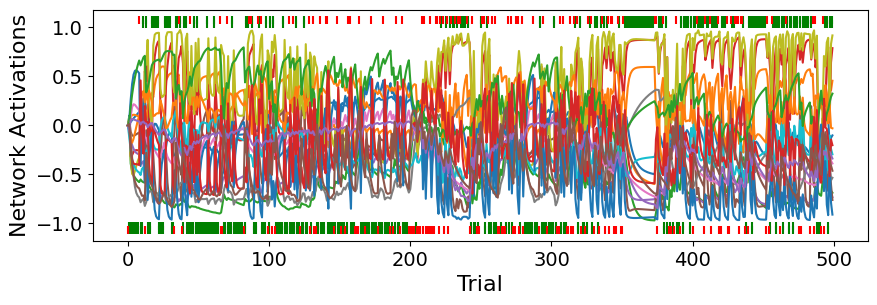

In [48]:
#@title Plot internal workings of the model
#可视化GRU模型在特定测试会话中的行为，展示模型的选择、奖励以及内部状态（激活）
# Run the agent on a session
xs, ys = next(dataset_test)
network_outputs, network_states = rnn_utils.eval_model(make_gru, gru_params, xs)

# Plot session
network_states = np.array(network_states)
#sess_i = 0
sess_i = 1

trial_end = rnn_utils.find_session_end(xs[:, sess_i, 0])
choices = xs[:trial_end, sess_i, 0]
rewards = xs[:trial_end, sess_i, 1]
gru_activations = network_states[:trial_end, 0, sess_i, :]
bandits.plot_session(
    choices=choices,
    rewards=rewards,
    timeseries=gru_activations,
    timeseries_name='Network Activations')
# 构建文件名并保存路径
save_path = os.path.join(save_dir, sub, f'{sub}_p5_session_1.png')
# 保存图片
plt.savefig(save_path)
# 显示绘图（可选）
plt.show()

Plot internal workings of the model


NameError: name 'save_dir' is not defined

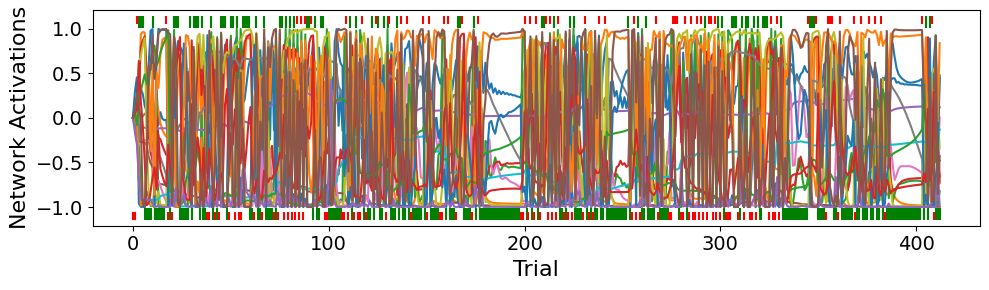

In [32]:
#@title Plot internal workings of the model
#可视化GRU模型在特定测试会话中的行为，展示模型的选择、奖励以及内部状态（激活）
print("Plot internal workings of the model")

# Run the agent on a session
xs, ys = next(dataset_test)
network_outputs, network_states = rnn_utils.eval_model(make_gru, gru_params, xs)

# Plot session
network_states = np.array(network_states)
sess_i = 5

trial_end = rnn_utils.find_session_end(xs[:, sess_i, 0])
choices = xs[:trial_end, sess_i, 0]
rewards = xs[:trial_end, sess_i, 1]
gru_activations = network_states[:trial_end, 0, sess_i, :]
bandits.plot_session(
    choices=choices,
    rewards=rewards,
    timeseries=gru_activations,
    timeseries_name='Network Activations')

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p9_GRU_session_0.png')
plt.savefig(save_path)
plt.show()

**Questions:**
* To what extent are these activations "interpretable"? Is it even possible to tell from this figure?

Now, let's run this new model "open-loop": As in Part 1, we will use it to generate choices so we can analyze its behavior. Execute the next cell to create a dataset of GRU choices on the 2-armed bandit task.

In [33]:
#@title Synthesize a dataset using the fit network
#使用训练好的GRU生成一个新的数据集
gru_agent = bandits.AgentNetwork(make_gru, gru_params)
_, experiment_list_gru = bandits.create_dataset(gru_agent, environment, n_trials_per_session, n_sessions)

Now, let's see how behavior compares to the behavior of the original dataset, looking at the same diagnostic plots.

Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Total Reward Rate is: 58.858%
Total Reward Rate is: 57.780%


NameError: name 'save_dir' is not defined

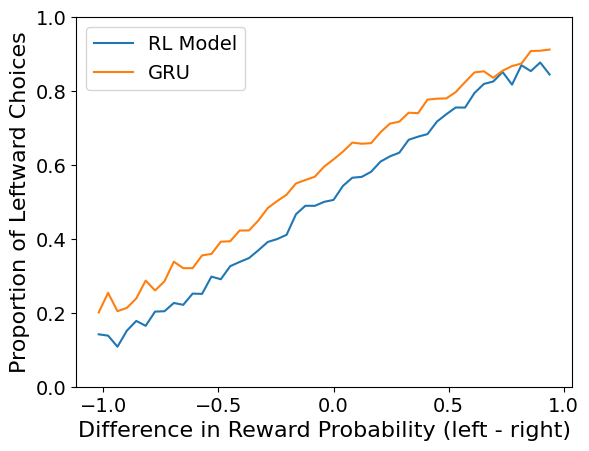

In [34]:
#@title Plot behavior diagnostics
bandits.show_valuemetric(experiment_list_train, label='Train')
bandits.show_total_reward_rate(experiment_list_train)

bandits.show_valuemetric(experiment_list_test, label='Test')
bandits.show_total_reward_rate(experiment_list_test)

bandits.show_valuemetric(experiment_list_rl, label='RL Model')
bandits.show_total_reward_rate(experiment_list_rl)

bandits.show_valuemetric(experiment_list_gru, label='GRU')
bandits.show_total_reward_rate(experiment_list_gru)

plt.legend()

# 构建文件名并保存路径
save_path = os.path.join(save_dir, sub, f'{sub}_p6_GRU_behavior_diagnostics.png')
# 保存图片
plt.savefig(save_path)
# 显示绘图（可选）
plt.show()

Plot behavior diagnostics
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Total Reward Rate is: 58.858%
Total Reward Rate is: 57.780%


NameError: name 'save_dir' is not defined

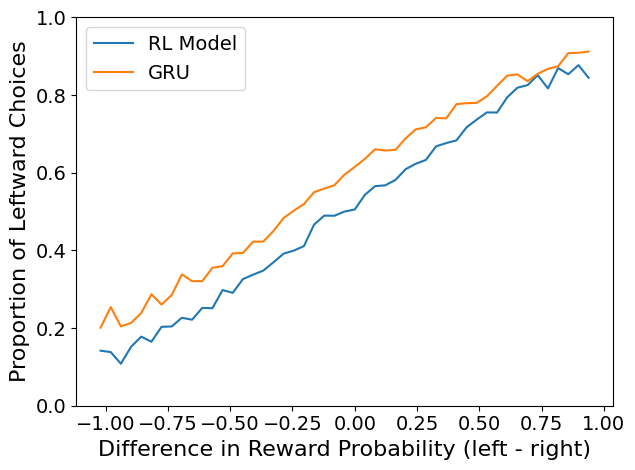

In [35]:
#@title Plot behavior diagnostics
print("Plot behavior diagnostics")

bandits.show_valuemetric(experiment_list_train, label='Train')
bandits.show_total_reward_rate(experiment_list_train)

bandits.show_valuemetric(experiment_list_test, label='Test')
bandits.show_total_reward_rate(experiment_list_test)

bandits.show_valuemetric(experiment_list_rl, label='RL Model')
bandits.show_total_reward_rate(experiment_list_rl)

bandits.show_valuemetric(experiment_list_gru, label='GRU')
bandits.show_total_reward_rate(experiment_list_gru)

plt.legend()

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p10_GRU_behavior_diagnostics.png')
plt.savefig(save_path)
plt.show()

NameError: name 'save_dir' is not defined

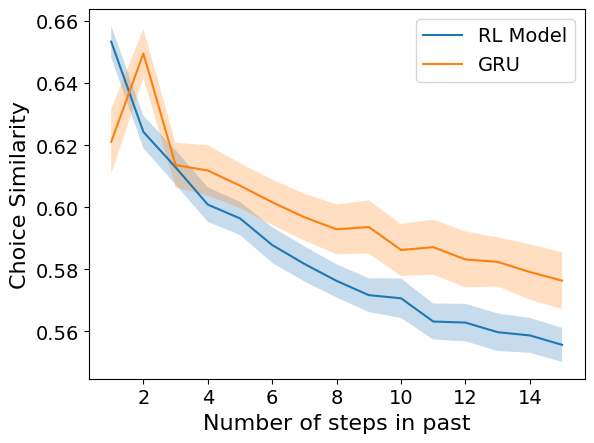

In [36]:
#绘制不同模型在选择行动时与其历史选择的相似性，帮助用户理解各个模型的决策过程和行为模式。
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    experiment_list_gru,
    n_steps_back=16,
    labels=['Train', 'Test', 'RL Model', 'GRU'])
# 构建文件名并保存路径
save_path = os.path.join(save_dir, sub, f'{sub}_p7_GRU_action_similarity_to_history.png')
# 保存图片
plt.savefig(save_path)
# 显示绘图（可选）
plt.show()


NameError: name 'save_dir' is not defined

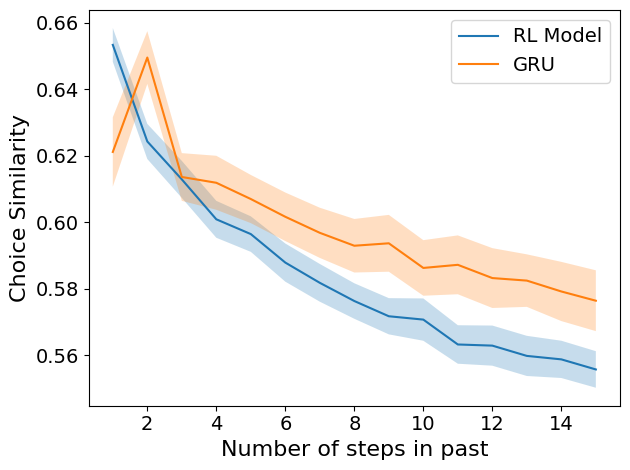

In [37]:
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    experiment_list_gru,
    n_steps_back=16,
    labels=['Train', 'Test', 'RL Model', 'GRU'])
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p11_GRU_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()

**Questions:**
* How well do the different models we've looked at so far?
* How do they differ in terms of predictability and interpretability?

# Part 3: Fitting with "Interpretable" RNNs

## Disentangled RNNs
In this section, we will explore using "disentangled RNNs" ([Miller et al 2023](https://www.biorxiv.org/content/10.1101/2023.06.23.546250v1)) to learn a predictive model that is constrained to yield interpretable latent variables. The model fitting will proceed in the same fashion as in parts 1 + 2; however, now the model has additional structure that will encourage it to learn more interpretable models.

Training this model can take several minutes if you are not connected to a GPU kernel. If you are impatient to move on to Hybrid-RNNs, you can lower the number of steps for training (`n_steps`), but keep in mind this model's performance (and interpretability) will likely still be far from optimal.

In [51]:
print("--------------------Part 3--------------------")

--------------------Part 3--------------------


In [38]:
#@title Set up Disentangled RNN.
#设置一个解耦递归神经网络（Disentangled RNN），定义其结构参数并创建模型构造函数
#@markdown Number of latent units in the model.
latent_size = 5  #@param 潜在单元数 用于捕捉输入数据的潜在特征（潜变量）

#@markdown Number of hidden units in each of the two layers of the update MLP.
#更新MLP结构，设置用于更新过程的多层感知机的隐藏单元结构，指定了两个隐藏层 每层有3个单元
update_mlp_shape = (5,5,5,)  #@param (3,3,) 

#@markdown Number of hidden units in each of the two layers of the choice MLP.
#选择MLP结构 设置用于选择过程的多层感知器的隐藏单元结构，指定为一个隐藏层，有2个单元。
choice_mlp_shape = (2,2,) #param (2,)

#定义模型构造函数 用于创建一个解耦RNN模型实例
def make_disrnn():
  model = disrnn.HkDisRNN(latent_size = latent_size,
                          update_mlp_shape = update_mlp_shape,
                          choice_mlp_shape = choice_mlp_shape,
                          target_size=2) #动作数量为2
  return model

#定义评估模式的模型构造函数 用于创建评估模式下的解耦RNN模型 可以在评估时使用 避免训练模式下的某些状态（如随机性）对结果的影响
def make_disrnn_eval():
  model = disrnn.HkDisRNN(latent_size = latent_size,
                          update_mlp_shape = update_mlp_shape,
                          choice_mlp_shape = choice_mlp_shape,
                          target_size=2,
                          eval_mode=True)
  return model


optimizer = optax.adam(learning_rate=5e-3) #学习率为0.01 1e-2

In [39]:
#@title Fit disRNN with no penalty at first, to get good quality-of-fit
#设置参数并调用训练函数，训练一个解耦递归神经网络（disRNN），最初不使用信息惩罚，以获得良好的拟合质量
#@markdown You can experiment with different values, but colab has been tested with 1000.
print(('Warning: this step can be rather time consuming without GPU access. If you are not running on a GPU\n, '
       'you may want to set n_steps to a very low value and return to the exercise when you \n'
       'have access to hardware acceleration.'))
n_steps = 1000 #@param
information_penalty = 0

disrnn_params, opt_state, losses = rnn_utils.train_model(
    model_fun = make_disrnn,
    dataset = dataset_train,
    optimizer = optimizer,
    loss_fun = 'penalized_categorical', #使用带惩罚的分类损失函数，尽管此时惩罚系数为0
    penalty_scale=information_penalty, #信息惩罚的缩放因子，当前设为0
    n_steps=n_steps,
    do_plot=False, #不绘制训练过程中的损失图
    truncate_seq_length=200, #将序列长度截断为200，以减少计算复杂度
)

, you may want to set n_steps to a very low value and return to the exercise when you 
have access to hardware acceleration.
Step 1000 of 1000; Loss: 4.8903e+03. (Time: 25.6s)

Step 100 of 100; Loss: 5.6444e+03. (Time: 5.8s)

NameError: name 'save_dir' is not defined

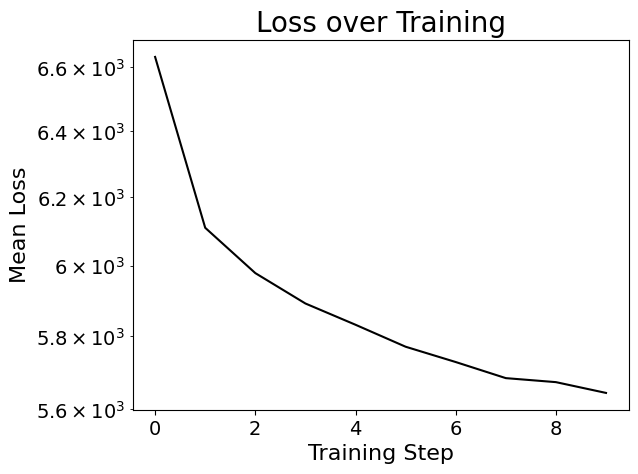

In [40]:
#@title Now fit more steps with a penalty, to encourage it to find a simple solution
#@markdown You can experiment with different values, but colab has been tested with 3000.
#使用一个惩罚项对disRNN进行训练
#n_steps = 3000  #@param
n_steps = 100  #@param
information_penalty = 1e-3  #@param

#更新后的模型参数 优化器状态 损失值
disrnn_params, opt_state, losses = rnn_utils.train_model(
    model_fun = make_disrnn,
    dataset = dataset_train,
    optimizer = optimizer,
    loss_fun = 'penalized_categorical',
    params=disrnn_params,
    opt_state=opt_state,
    penalty_scale=information_penalty,
    n_steps=n_steps,
    truncate_seq_length=200,
)
# 构建文件名并保存路径
save_path = os.path.join(save_dir, sub, f'{sub}_p8_disRNN_Loss_over_Training.png')
# 保存图片
plt.savefig(save_path)
# 显示绘图（可选）
plt.show()

fit more steps with a penalty, to encourage it to find a simple solution
Step 100 of 100; Loss: 5.4740e+03. (Time: 5.7s)

NameError: name 'save_dir' is not defined

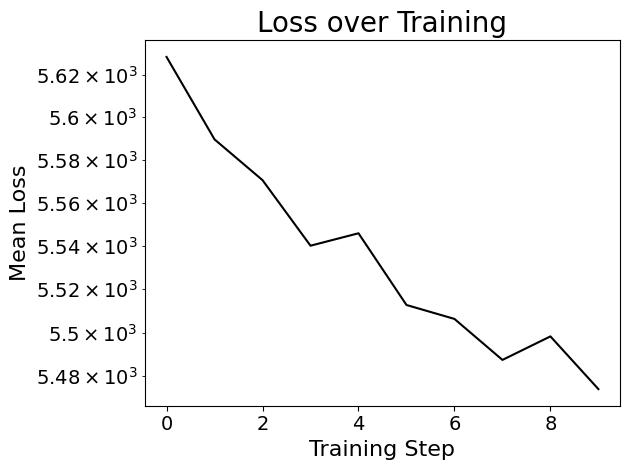

In [41]:
#@title Now fit more steps with a penalty, to encourage it to find a simple solution
#@markdown You can experiment with different values, but colab has been tested with 3000.
#使用一个惩罚项对disRNN进行训练
print("fit more steps with a penalty, to encourage it to find a simple solution")

n_steps = 100  #@param 3000
information_penalty = 1e-3  #@param

#更新后的模型参数 优化器状态 损失值
disrnn_params, opt_state, losses = rnn_utils.train_model(
    model_fun = make_disrnn,
    dataset = dataset_train,
    optimizer = optimizer,
    loss_fun = 'penalized_categorical',
    params=disrnn_params,
    opt_state=opt_state,
    penalty_scale=information_penalty,
    n_steps=n_steps,
    truncate_seq_length=200,
)

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p12_disRNN_Loss.png')
plt.savefig(save_path)
plt.show()

## Visualize model latents.
Here we will visualize the model update terms and the masking on each latent variable and input. We will also plot the activities of latent units in the model to see if they reveal anything about the learning mechanisms.  

NameError: name 'save_dir' is not defined

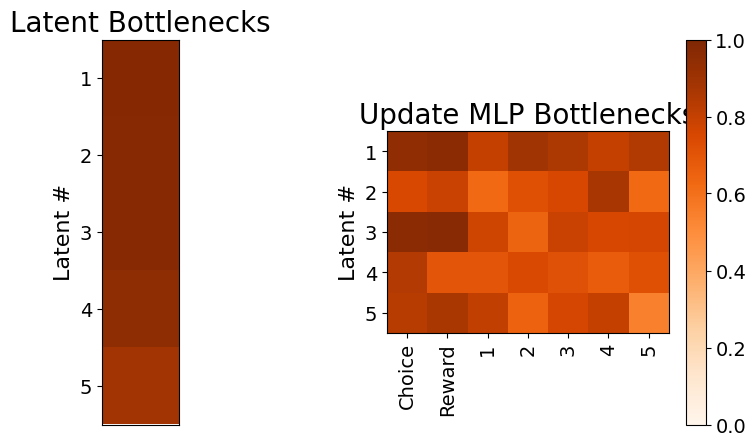

In [42]:
#@title Visualize bottleneck latents + learned update.
#可视化 Disentangled RNN（disRNN）模型的瓶颈潜变量（bottleneck latents）和学习到的更新规则（update rules）

#瓶颈潜变量是模型在信息传递过程中压缩后的表示，通常用于捕获数据的关键特征
#disrnn_params: 这是训练后的模型参数，包含了瓶颈潜变量的相关信息。
#通过可视化这些潜变量，可以观察模型如何在不同的输入条件下进行特征学习。
disrnn.plot_bottlenecks(disrnn_params) 
save_path = os.path.join(save_dir, sub, f'{sub}_p9_disRNN_bottlenecks.png')
plt.savefig(save_path)
plt.show()

#更新规则描述了在每个时间步骤如何根据当前状态和输入信息更新潜变量。
#disrnn_params: 同样是训练后的模型参数，包含了学习到的更新规则的信息
#make_disrnn_eval: 是用于创建模型评估版本的函数。在可视化更新规则时，可能会使用这个函数来确保模型处于评估模式
figs = disrnn.plot_update_rules(disrnn_params, make_disrnn_eval)
# 遍历生成的图像，并保存
for i, fig in enumerate(figs):
    save_path = os.path.join(save_dir, sub, f'{sub}_p10_disRNN_update_rules_{i+1}.png')  # 保存文件路径
    fig.savefig(save_path)  # 保存图像
    #plt.close(fig)  # 关闭图像，释放内存

Visualize bottleneck latents + learned update


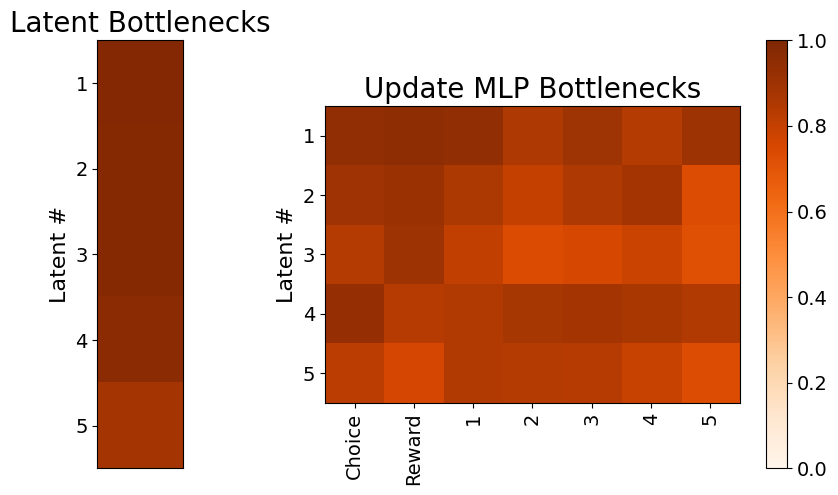

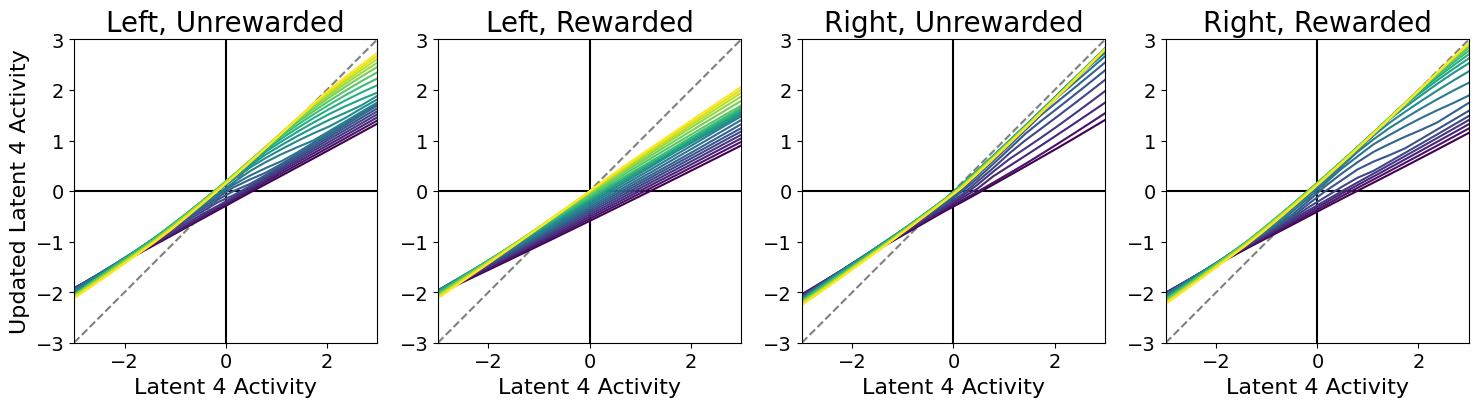

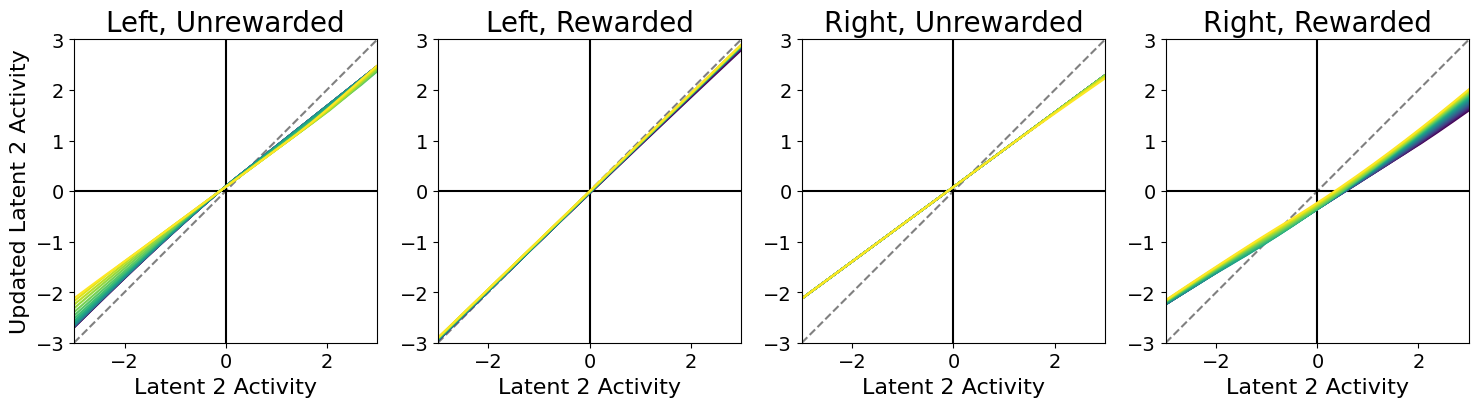

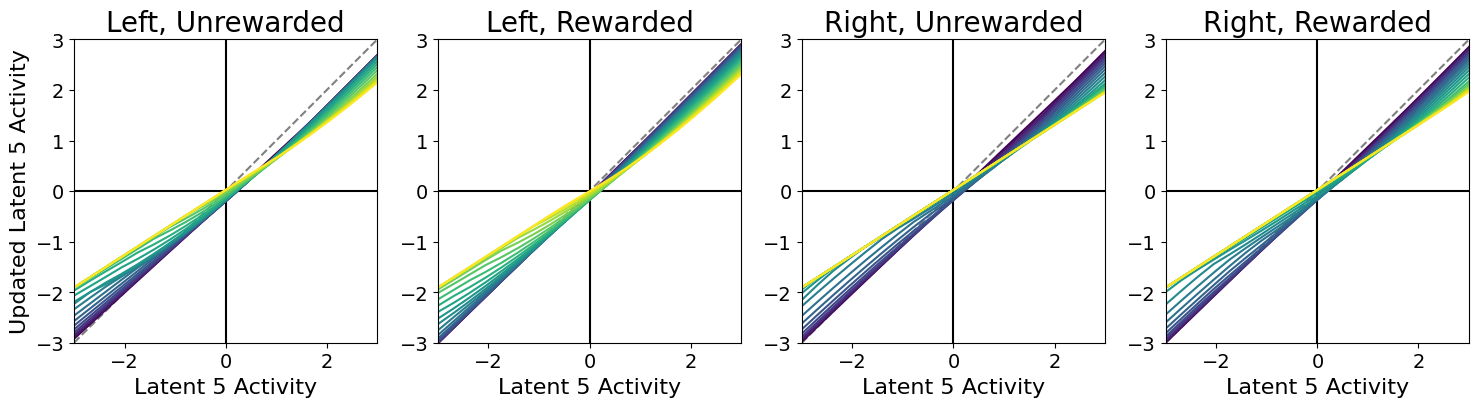

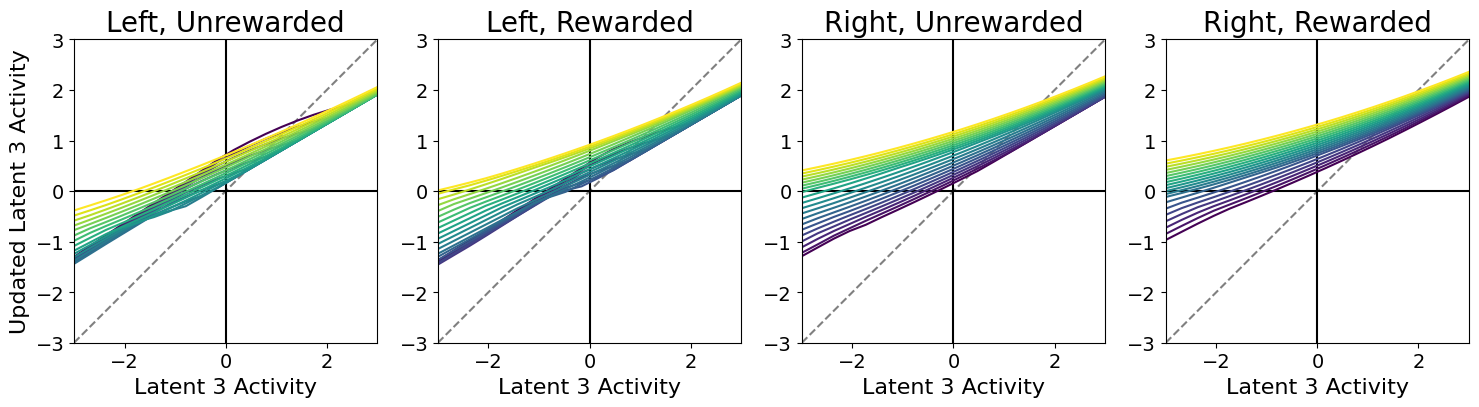

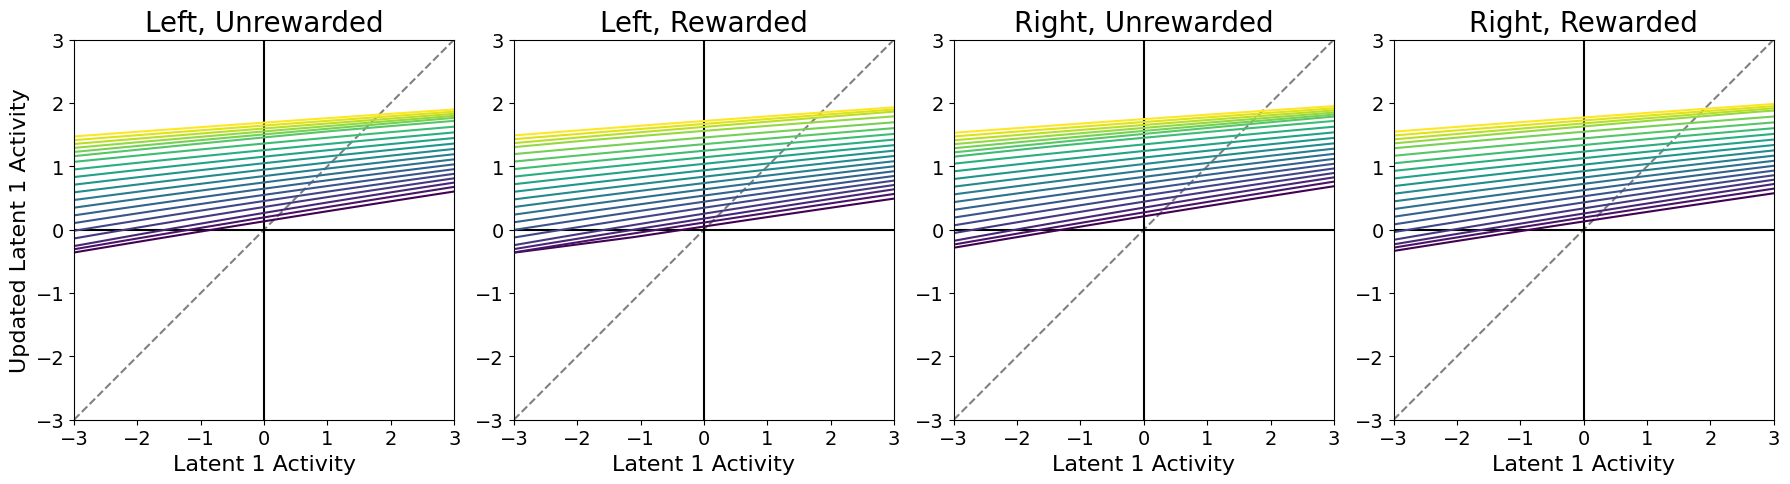

In [57]:
#@title Visualize bottleneck latents + learned update.
#可视化 Disentangled RNN（disRNN）模型的瓶颈潜变量（bottleneck latents）和学习到的更新规则（update rules）
print("Visualize bottleneck latents + learned update")

#瓶颈潜变量是模型在信息传递过程中压缩后的表示，通常用于捕获数据的关键特征
#disrnn_params: 这是训练后的模型参数，包含了瓶颈潜变量的相关信息。
#通过可视化这些潜变量，可以观察模型如何在不同的输入条件下进行特征学习。
disrnn.plot_bottlenecks(disrnn_params)
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p13_disRNN_bottlenecks.png')
plt.savefig(save_path)
plt.show()

#更新规则描述了在每个时间步骤如何根据当前状态和输入信息更新潜变量。
#disrnn_params: 同样是训练后的模型参数，包含了学习到的更新规则的信息
#make_disrnn_eval: 是用于创建模型评估版本的函数。在可视化更新规则时，可能会使用这个函数来确保模型处于评估模式
figs = disrnn.plot_update_rules(disrnn_params, make_disrnn_eval)
# 遍历生成的图像，并保存
for i, fig in enumerate(figs):
    plt.tight_layout()
    save_path = os.path.join(save_dir, sub, f'{sub}_p14_disRNN_update_rules_{i+1}.png')  # 保存文件路径
    fig.savefig(save_path)  # 保存图像
    #plt.close(fig)  # 关闭图像，释放内存

NameError: name 'save_dir' is not defined

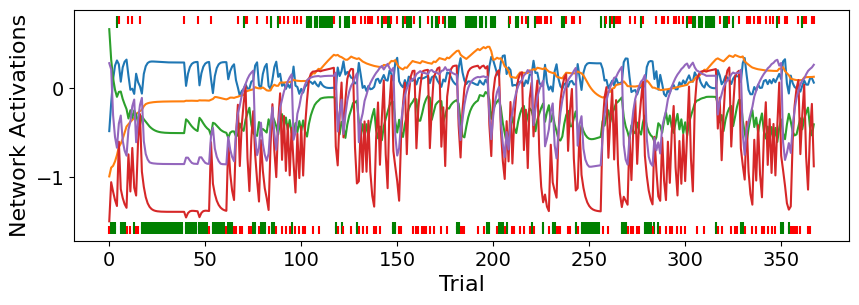

In [75]:
#@title Plot example session: latents + choices.
#绘制一个示例会话，显示 Disentangled RNN（disRNN）模型的潜变量（latents）和选择（choices）
xs, ys = next(dataset_test)
sess_i = 1
trial_end = rnn_utils.find_session_end(xs[:, sess_i, 0])

#评估 Disentangled RNN 模型并获取其输出和状态
network_outputs, network_states = rnn_utils.eval_model(
    make_disrnn_eval, disrnn_params, xs[:trial_end, sess_i:sess_i+1])

#处理模型输出
network_states = np.array(network_states)
choices = xs[:trial_end, sess_i, 0]
rewards = xs[:trial_end, sess_i, 1]
#disrnn_activations = network_states[:trial_end, sess_i, :] #提取潜变量激活值，表示模型在不同时间步的内部状态
disrnn_activations = network_states[:trial_end, 0, :] #提取潜变量激活值，表示模型在不同时间步的内部状态

#绘制session
bandits.plot_session(choices=choices,
                     rewards=rewards,
                     timeseries=disrnn_activations, #传入潜变量激活值，显示模型在时间序列中的变化
                     timeseries_name='Network Activations')

save_path = os.path.join(save_dir, sub, f'{sub}_p11_disRNN_latents_choices_session_0.png')
plt.savefig(save_path)
plt.show()


In [74]:
#@title Plot example session: latents + choices.
#绘制一个示例会话，显示 Disentangled RNN（disRNN）模型的潜变量（latents）和选择（choices）
print("Plot example session: latents + choices")

xs, ys = next(dataset_test)
sess_i = 1
trial_end = rnn_utils.find_session_end(xs[:, sess_i, 0])

#评估 Disentangled RNN 模型并获取其输出和状态
network_outputs, network_states = rnn_utils.eval_model(
    make_disrnn_eval, disrnn_params, xs[:trial_end, sess_i:sess_i+1])

#处理模型输出
network_states = np.array(network_states)
choices = xs[:trial_end, sess_i, 0]
rewards = xs[:trial_end, sess_i, 1]
disrnn_activations = network_states[:trial_end, sess_i, :] #提取潜变量激活值，表示模型在不同时间步的内部状态

#绘制session
bandits.plot_session(choices=choices,
                     rewards=rewards,
                     timeseries=disrnn_activations, #传入潜变量激活值，显示模型在时间序列中的变化
                     timeseries_name='Network Activations')
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p15_disRNN_latents_choices_session_0.png')
plt.savefig(save_path)
plt.show()

Plot example session: latents + choices


IndexError: index 1 is out of bounds for axis 1 with size 1

In [57]:
#@title Normalized likelihoods
print('Normalized Likelihoods for Disentangled RNN')
print('Training Dataset')
training_likelihood = compute_log_likelihood(
    dataset_train, make_disrnn_eval, disrnn_params)
print('Held-Out Dataset')
testing_likelihood = compute_log_likelihood(
    dataset_test, make_disrnn_eval, disrnn_params)

Normalized Likelihoods for Disentangled RNN
Training Dataset
Normalized Likelihood: 61.9%
Held-Out Dataset
Normalized Likelihood: 61.7%


### Qualitative fit.
Finally, we will revisit the behavioral diagnostics we explored at the beginning.

In [58]:
#@title Synthesize a dataset using the fit network
#用训练好的disRNN模型生成一个新的数据集
#创建代理 这里使用的是评估模式下的 Disentangled RNN 模型
disrnn_agent = bandits.AgentNetwork(make_disrnn_eval, disrnn_params)

#基于指定的代理生成一个新数据集
_, experiment_list_disrnn = bandits.create_dataset(
    disrnn_agent, environment, n_trials_per_session, n_sessions)

Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Total Reward Rate is: 58.858%
Total Reward Rate is: 57.780%
Total Reward Rate is: 59.063%


NameError: name 'save_dir' is not defined

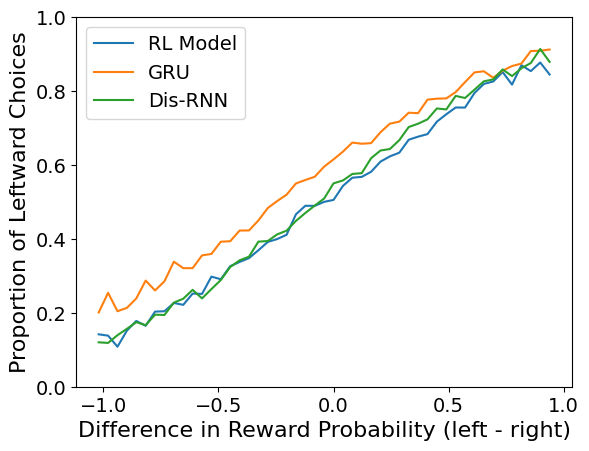

In [59]:
#@title Plot behavior diagnostics
bandits.show_valuemetric(experiment_list_train, label='Train')
bandits.show_total_reward_rate(experiment_list_train)

bandits.show_valuemetric(experiment_list_test, label='Test')
bandits.show_total_reward_rate(experiment_list_test)

bandits.show_valuemetric(experiment_list_rl, label='RL Model')
bandits.show_total_reward_rate(experiment_list_rl)

bandits.show_valuemetric(experiment_list_gru, label='GRU')
bandits.show_total_reward_rate(experiment_list_gru)

bandits.show_valuemetric(experiment_list_disrnn, label='Dis-RNN')
bandits.show_total_reward_rate(experiment_list_disrnn)

plt.legend()

save_path = os.path.join(save_dir, sub, f'{sub}_p12_disRNN_behavior_diagnostics.png')
plt.savefig(save_path)
plt.show()

Plot behavior diagnostics
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Skipping experiment because None value was found for experiment_lists.
This is usually the case when using imported real data.
Skipping showing reward rate for Non experiment_list
Total Reward Rate is: 58.858%
Total Reward Rate is: 57.780%
Total Reward Rate is: 59.063%


NameError: name 'save_dir' is not defined

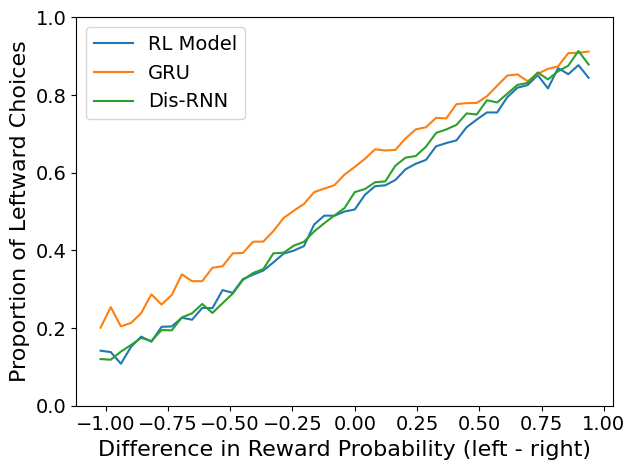

In [60]:
#@title Plot behavior diagnostics
print('Plot behavior diagnostics')

bandits.show_valuemetric(experiment_list_train, label='Train')
bandits.show_total_reward_rate(experiment_list_train)

bandits.show_valuemetric(experiment_list_test, label='Test')
bandits.show_total_reward_rate(experiment_list_test)

bandits.show_valuemetric(experiment_list_rl, label='RL Model')
bandits.show_total_reward_rate(experiment_list_rl)

bandits.show_valuemetric(experiment_list_gru, label='GRU')
bandits.show_total_reward_rate(experiment_list_gru)

bandits.show_valuemetric(experiment_list_disrnn, label='Dis-RNN')
bandits.show_total_reward_rate(experiment_list_disrnn)

plt.legend()

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p16_disRNN_behavior_diagnostics.png')
plt.savefig(save_path)
plt.show()

NameError: name 'save_dir' is not defined

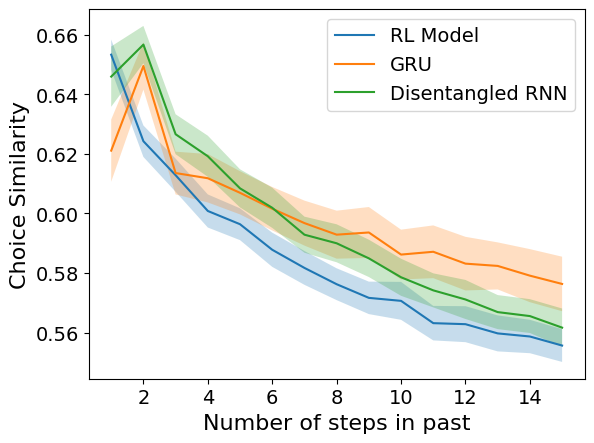

In [61]:
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    experiment_list_gru,
    experiment_list_disrnn,
    n_steps_back=16,
    labels=['Train', 'Test', 'RL Model', 'GRU', 'Disentangled RNN'])

save_path = os.path.join(save_dir, sub, f'{sub}_p13_disRNN_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()


NameError: name 'save_dir' is not defined

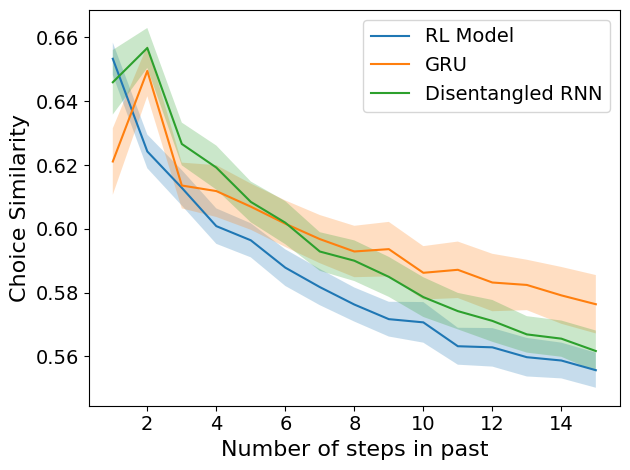

In [62]:
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    experiment_list_gru,
    experiment_list_disrnn,
    n_steps_back=16,
    labels=['Train', 'Test', 'RL Model', 'GRU', 'Disentangled RNN'])

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p17_disRNN_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()

## Hybrid RNNs

In this section, we will explore a different approach to building interpretable models with RNNs: the hybrid-RNN approach from [Eckstein et al 2023](https://www.biorxiv.org/content/10.1101/2023.05.17.541226v1.abstract). The central idea is to replace components of RL models one-by-one with Neural Networks, thus using data to fit certain terms with potentially complex functions.

In [74]:
print("-----------------Part 3------HybridRNN-----------------")

-----------------Part 3------HybridRNN-----------------


In [63]:
#@title Set up Hybrid RNN.

#配置参数
#@markdown Is the model recurrent (ie can it see the hidden state from the previous step)
use_hidden_state = 'True'  #@param ['True', 'False'] 模型在每个时间步可以访问前一步的隐藏状态

#@markdown Is the model recurrent (ie can it see the hidden state from the previous step)
use_previous_values = 'False'  #@param  不根据上一个时间步的输出调整当前时间步的输入

#@markdown If True, learn a value for the forgetting term
fit_forget = "True"  #@param 模型将学习一个遗忘项的值，用于调整隐藏状态的保留程度

#@markdown Learn a reward-independent term that depends on past choices.
habit_weight = 1  #@param [0, 1]  学习一个与过去选择相关的奖励独立项，值在 [0, 1] 范围内

value_weight = 1.  # This is needed for it to be doing RL 用于强化学习（RL），确保模型在学习过程中考虑奖励的价值

#组织参数  是一个字典，包含了上面配置的所有参数，它将被传递给模型以调整其行为
rnn_rl_params = {
    's': use_hidden_state == 'True',
    'o': use_previous_values == 'True',
    'fit_forget': fit_forget == 'True',
    'forget': 0.,
    'w_h': habit_weight,
    'w_v': value_weight}

#网络参数，可选择动作数量2，隐藏层单元数16
network_params = {'n_actions': 2, 'hidden_size': 16}

#创建模型的函数
def make_hybrnn():
  model = hybrnn.BiRNN(rl_params=rnn_rl_params, network_params=network_params)
  return model

#设置优化器
optimizer = optax.adam(learning_rate=1e-2)


In [64]:
#@title Fit the hybrid RNN 训练模型
hybrnn_params, _ = rnn_utils.fit_model(
    model_fun=make_hybrnn,
    dataset=dataset_train,
    optimizer=optimizer,
    loss_fun='categorical',
    convergence_thresh=1e-4,
    n_steps_max=5000,
)


Step 500 of 500; Loss: 1.3448e+04. (Time: 11.0s)
Maximum iterations reached. Time elapsed = 0e+00s.


### Quantitative + Qualitative Fit
Once again, we will synthesize a dataset from the fitted model and compare it quantitatively and qualitatively to the data.

In [65]:
#@title Synthesize a dataset using the fitted network
#使用训练好的混合型循环神经网络（Hybrid RNN）生成一个新的数据集
hybrnn_agent = bandits.AgentNetwork(make_hybrnn, hybrnn_params, )
_, experiment_list_hybrnn = bandits.create_dataset(
    hybrnn_agent, environment, n_trials_per_session, n_sessions)

In [66]:
#@title Save out latent variables from the network.
#从训练好的混合型循环神经网络（Hybrid RNN）中提取潜在变量（latent variables）并保存到数组中
xs, ys = next(dataset_test)
network_outputs, network_states = rnn_utils.eval_model(make_hybrnn, hybrnn_params, xs)

#初始化变量 分别存储隐藏状态、价值状态、与行为相关的输出（记录每个试验的选择）、与价值相关的输出（每个试验的价值输出）
h_state = np.zeros((n_trials_per_session, n_sessions, network_params['hidden_size']))
v_state = np.zeros((n_trials_per_session, n_sessions, network_params['hidden_size']))
h = np.zeros((n_trials_per_session, n_sessions, network_params['n_actions']))
v = np.zeros((n_trials_per_session, n_sessions, network_params['n_actions']))

#提取潜在变量
for t in range(n_trials_per_session):
  for s in range(len(network_states)):
    h_state[t] = network_states[t][0]
    v_state[t] = network_states[t][1]
    h[t] = network_states[t][2]
    v[t] = network_states[t][3]
      

NameError: name 'save_dir' is not defined

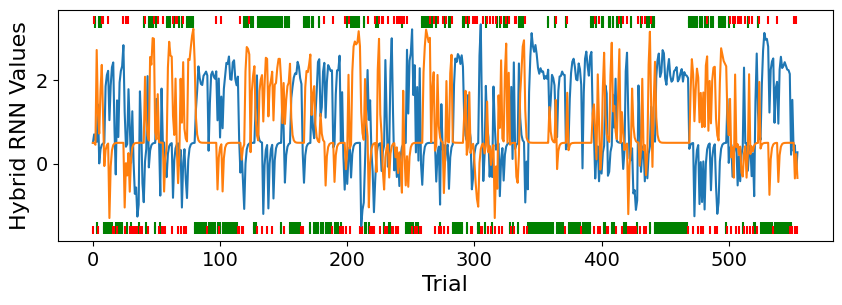

In [72]:
#@title Plot latents and simulated behavior across session for Hybrid-RNN.
#可视化混合型循环神经网络（Hybrid RNN）在给定会话中的潜在变量和模拟行为
sess_i = 6
# 确定会话的真实结束点
trial_end = rnn_utils.find_session_end(xs[:, sess_i, 0])

#获取选择和奖励
#choices = xs[:, sess_i, 0]
#rewards = xs[:, sess_i, 1]
# 获取选择和奖励，并裁剪到会话的真实长度
choices = xs[:trial_end, sess_i, 0]
rewards = xs[:trial_end, sess_i, 1]

#获取潜在变量
#hybrnn_values = v[:, sess_i, :]
#hybrnn_v_state = v_state[:, sess_i, :]
# 获取潜在变量，并裁剪到会话的真实长度
hybrnn_values = v[:trial_end, sess_i, :]
hybrnn_v_state = v_state[:trial_end, sess_i, :]

#绘制session
bandits.plot_session(choices=choices,
                     rewards=rewards,
                     timeseries=hybrnn_values, #绘制潜在变量（Hybrid RNN 的输出值）
                     timeseries_name='Hybrid RNN Values')

save_path = os.path.join(save_dir, sub, f'{sub}_p14_HybridRNN_session_0.png')
plt.savefig(save_path)
plt.show()


Plot latents and simulated behavior across session for Hybrid-RNN


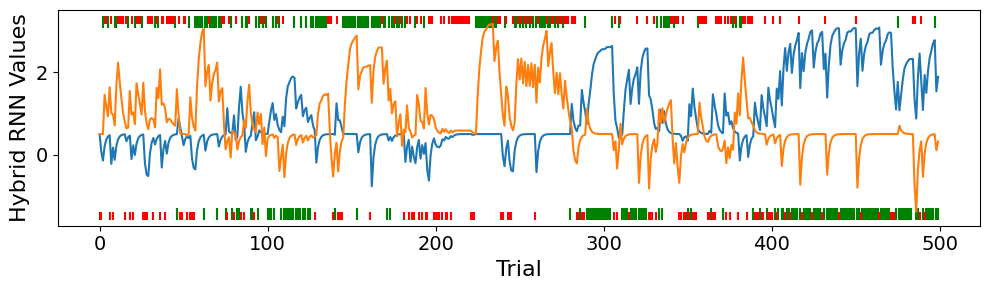

In [68]:
#@title Plot latents and simulated behavior across session for Hybrid-RNN.
#可视化混合型循环神经网络（Hybrid RNN）在给定会话中的潜在变量和模拟行为
print("Plot latents and simulated behavior across session for Hybrid-RNN")

sess_i = 0
#获取选择和奖励
choices = xs[:, sess_i, 0]
rewards = xs[:, sess_i, 1]

#获取潜在变量
hybrnn_values = v[:, sess_i, :]
hybrnn_v_state = v_state[:, sess_i, :]

#绘制session
bandits.plot_session(choices=choices,
                     rewards=rewards,
                     timeseries=hybrnn_values, #绘制潜在变量（Hybrid RNN 的输出值）
                     timeseries_name='Hybrid RNN Values')

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p18_HybridRNN_session_0.png')
plt.savefig(save_path)
plt.show()

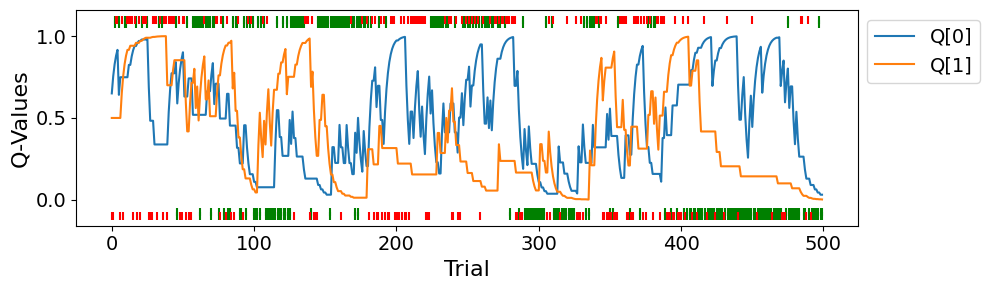

In [70]:
#@title Plot Q-values.
#可视化某个会话中的 Q 值（即动作价值），以帮助分析模型的决策过程
#timeseries: 这是 Q 值的时间序列数据，表示在每个时间步骤下各个动作的价值。Q 值通常用于强化学习中，表示在特定状态下选择特定动作的预期回报。
bandits.plot_session(
    choices=choices, rewards=rewards, timeseries=qs, timeseries_name='Q-Values',
    labels=[f'Q[{a}]' for a in range(n_actions)])
plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p19_Q-values.png')
plt.savefig(save_path)
plt.show()

**Question:** Above we plotted the Q-values. Can we do that for the GRU or the Disentangled RNN? What is required of models to enable this?

In [71]:
#@title Print Normalized Likelihoods for Hybrid RNN.
print('Normalized Likelihoods for Hybrid RNN')
print('Training Dataset')
training_likelihood = compute_log_likelihood(dataset_train, make_hybrnn, hybrnn_params)
print('Held-Out Dataset')
testing_likelihood = compute_log_likelihood(dataset_test, make_hybrnn, hybrnn_params)

Normalized Likelihoods for Hybrid RNN
Training Dataset
Normalized Likelihood: 59.4%
Held-Out Dataset
Normalized Likelihood: 59.4%


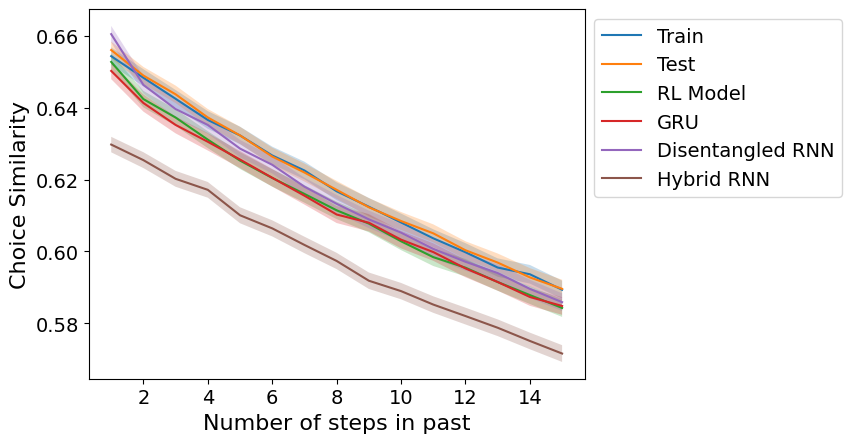

In [72]:
#@title Plot action similarities.
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    experiment_list_gru,
    experiment_list_disrnn,
    experiment_list_hybrnn,
    n_steps_back=16,
    labels=['Train', 'Test', 'RL Model', 'GRU', 'Disentangled RNN', 'Hybrid RNN'],
    bbox_to_anchor=(1, 1))

save_path = os.path.join(save_dir, sub, f'{sub}_p16_HybridRNN_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()

Plot action similarities


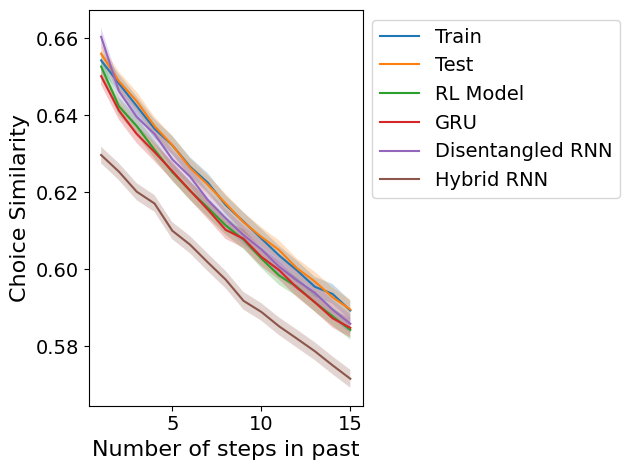

In [73]:
#@title Plot action similarities.
print('Plot action similarities')
plotting.plot_action_similarity_to_history(
    experiment_list_train,
    experiment_list_test,
    experiment_list_rl,
    experiment_list_gru,
    experiment_list_disrnn,
    experiment_list_hybrnn,
    n_steps_back=16,
    labels=['Train', 'Test', 'RL Model', 'GRU', 'Disentangled RNN', 'Hybrid RNN'],
    bbox_to_anchor=(1, 1))

plt.tight_layout()
save_path = os.path.join(save_dir, sub, f'{sub}_p20_HybridRNN_action_similarity_to_history.png')
plt.savefig(save_path)
plt.show()

# Part 4: Compare different datasets.

Return to Part 1 and select a different value for dataset_type: 'Synthetic_MysteryQ'. Repeat Parts 1 + 2.

How do the answers to your questions differ?

# Part 5: Work with real data

Congratulations, you have learned about a classic Q-learning agent, about model fitting, about neural networks, and about two new classes of hybrid models!

Now, let's see how we can apply this to a real dataset. Go back to [where we selected our dataset](#fit-classic-cognitive-model) and choose the rat dataset now!

Note: some parts of the visualizations will not work in the same way, since experiment_list_train and experiment_list_test are generated synthetically. What other metrics might you be interested in plotting?